Abstract:
This study presents a multi-class classification model using Auto H2O Automated Machine Learning (AML) 
to predict the quality of sleep based on various health and lifestyle predictors. 
The dataset comprises predictors such as Age, Sleep Duration, Physical Activity Level, Stress Level, Heart Rate, Daily Steps, Gender, Occupation, and BMI Category. 
The objective is to understand the impact of these factors on the quality of sleep, which is the 
target variable. 
The Auto H2O AML platform is utilized due to its efficiency in handling multi-class classification problems and its ability to automatically select the best model from a set of candidate models.
The results of this study could provide valuable insights into the relationship between lifestyle factors and sleep quality, potentially informing interventions to improve sleep health. 





Data cleaning and preprocessing

In [1]:
# installing dependencies
#!pip install eli5
%matplotlib inline
import pandas as pd #library for data analysis
import numpy as np #numerical python library to perform scientific calculations
import seaborn as sns #library for statistical plotting
import matplotlib.pyplot as plt
import math #to perform math functions

QSleep = pd.read_csv('https://raw.githubusercontent.com/Divi1393/barathwaaj_diviya_2445921_DSEM_Assignments/main/ML%20Data%20Cleaning%20and%20Feature%20Selection/SleepQuality.csv') #read the data file
QSleep.head(10) #display the first 10 enteries of the dataset to check the column enteries and names

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [2]:
#Replacing NaN with None
QSleep['Sleep Disorder'] = QSleep['Sleep Disorder'].replace({pd.NA: None})

In [3]:
QSleep.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [4]:
#Renaming columns for better understanding
df1 = QSleep.rename(columns={'Sleep Duration': 'SleepDuration', 'Quality of Sleep':'QualityofSleep', 'Physical Activity Level':'PhysicalActivityLevel','Stress Level': 'StressLevel','BMI Category':'BMICategory',
                            'Blood Pressure':'BloodPressure','Heart Rate':'HeartRate','Daily Steps':'DailySteps','Sleep Disorder':'SleepDisorder'})

In [5]:
df1.head()

,Person ID,Gender,Age,Occupation,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,BloodPressure,HeartRate,DailySteps,SleepDisorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
null_values = df1.isnull().sum() #check for null values
print("Null Values in each column:\n", null_values) #Displaying the result

Null Values in each column:
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
SleepDuration              0
QualityofSleep             0
PhysicalActivityLevel      0
StressLevel                0
BMICategory                0
BloodPressure              0
HeartRate                  0
DailySteps                 0
SleepDisorder            219
dtype: int64


In [7]:
# Find the data types of each column
data_types = df1.dtypes

# Separate columns into numerical and categorical. .
numerical_columns = data_types[data_types != 'object'].index
categorical_columns = data_types[data_types == 'object'].index

# Display the number of numerical and categorical columns
print(f"Number of Numerical Columns: {len(numerical_columns)}")
print(f"Number of Categorical Columns: {len(categorical_columns)}")

# Display the list of numerical and categorical columns
print("\nNumerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Number of Numerical Columns: 8
Number of Categorical Columns: 5

Numerical Columns:
Index(['Person ID', 'Age', 'SleepDuration', 'QualityofSleep',
       'PhysicalActivityLevel', 'StressLevel', 'HeartRate', 'DailySteps'],
      dtype='object')

Categorical Columns:
Index(['Gender', 'Occupation', 'BMICategory', 'BloodPressure',
       'SleepDisorder'],
      dtype='object')


In [8]:
#Checking for unique varibales in categorical columns
df1[categorical_columns].nunique()

Gender            2
Occupation       11
BMICategory       4
BloodPressure    25
SleepDisorder     2
dtype: int64

Handling Outliers - removing outliers using IQR

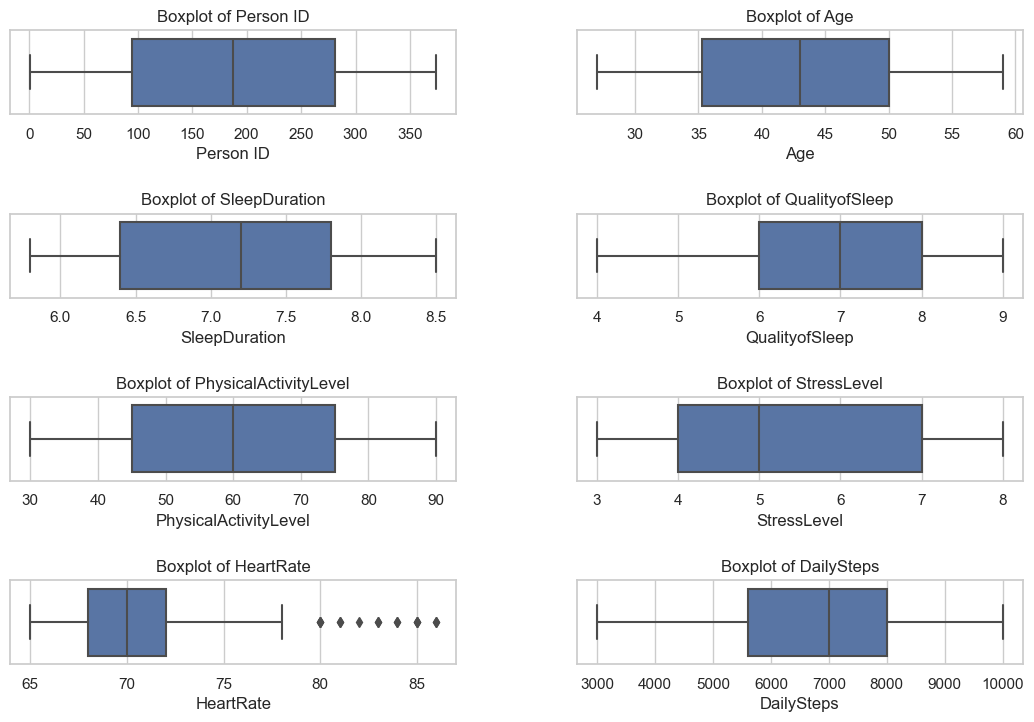

In [9]:
# Set the style
sns.set(style="whitegrid")

# Select numerical columns for boxplots
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns) // 2, ncols=2, figsize=(12, 2 * len(numerical_columns) // 2))
fig.tight_layout(pad=4.0)  # Adjust the spacing between subplots

# Create side-by-side boxplots with outliers for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df1[column], showfliers=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Boxplot of {column}')
    axes[i // 2, i % 2].set_xlabel(column)

plt.show()

Lower Bound : 61.8944243308451
Upper Bound : 78.43712647129395


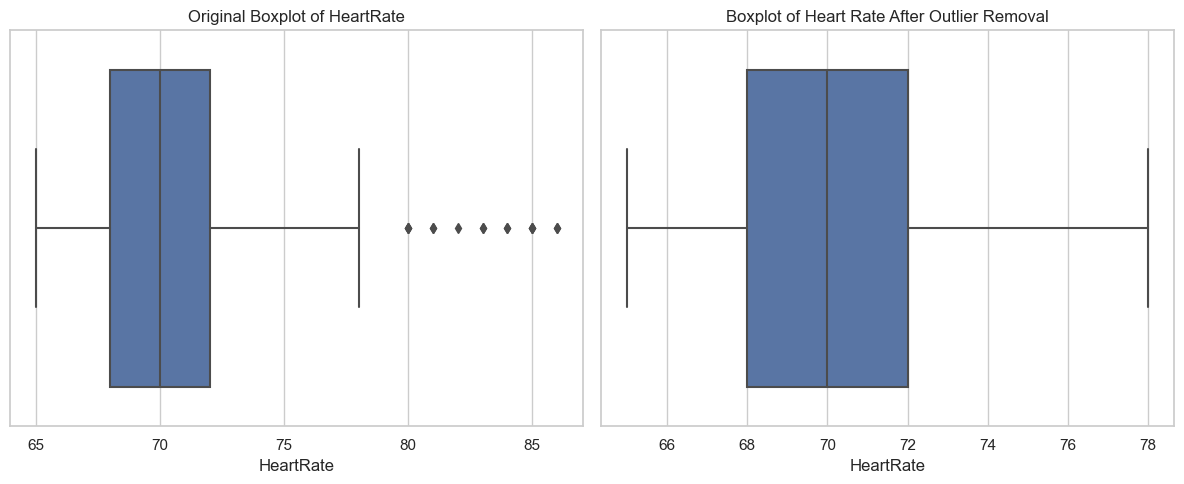

In [10]:
# Original Boxplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['HeartRate'])
plt.title('Original Boxplot of HeartRate')

# Calculate summary statistics
mean = df1['HeartRate'].mean()
std = df1['HeartRate'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std * 2
upper_bound = mean + std * 2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df2 = df1[(df1['HeartRate'] >= lower_bound) & (df1['HeartRate'] <= upper_bound)]

# Boxplot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df2['HeartRate'])
plt.title('Boxplot of Heart Rate After Outlier Removal')

plt.tight_layout()
plt.show()

Handling categorical columns

In [11]:
#Handling categorical columns
df2['BloodPressure'].unique()
df2 = pd.concat([df2, df2['BloodPressure'].str.split('/', expand=True)], axis=1).drop('BloodPressure', axis=1)
df2= df2.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})
df2.head(5)

,Person ID,Gender,Age,Occupation,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,BMICategory,HeartRate,DailySteps,SleepDisorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
7,8,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,120,80
8,9,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,120,80


One hot encoding of categorical variables

In [12]:
#One Hot Encoding of Categorical Columns

# Perform one-hot encoding using pandas get_dummies
df3 = pd.get_dummies(df2, columns=['Gender', 'Occupation', 'BMICategory','SleepDisorder'])

# Display the first few rows of the encoded DataFrame
print(df3.head())

   Person ID  Age  SleepDuration  QualityofSleep  PhysicalActivityLevel  \
0          1   27            6.1               6                     42   
1          2   28            6.2               6                     60   
2          3   28            6.2               6                     60   
7          8   29            7.8               7                     75   
8          9   29            7.8               7                     75   

   StressLevel  HeartRate  DailySteps BloodPressure_Upper_Value  \
0            6         77        4200                       126   
1            8         75       10000                       125   
2            8         75       10000                       125   
7            6         70        8000                       120   
8            6         70        8000                       120   

  BloodPressure_Lower_Value  ...  Occupation_Nurse  Occupation_Salesperson  \
0                        83  ...             False                  

In [13]:
# List of columns to convert to numerical
columns_to_convert = ['Occupation_Doctor', 'Occupation_Nurse', 'Occupation_Salesperson',
                      'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher',
                      'BMICategory_Normal', 'BMICategory_Normal Weight', 'BMICategory_Overweight',
                      'SleepDisorder_Insomnia', 'SleepDisorder_Sleep Apnea']

# Convert boolean columns to numerical
for col in columns_to_convert:
    df3[col] = df3[col].astype(int)

In [14]:
df3.head()

,Person ID,Age,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,HeartRate,DailySteps,BloodPressure_Upper_Value,BloodPressure_Lower_Value,...,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMICategory_Normal,BMICategory_Normal Weight,BMICategory_Overweight,SleepDisorder_Insomnia,SleepDisorder_Sleep Apnea
0,1,27,6.1,6,42,6,77,4200,126,83,...,0,0,0,1,0,0,0,1,0,0
1,2,28,6.2,6,60,8,75,10000,125,80,...,0,0,0,0,0,1,0,0,0,0
2,3,28,6.2,6,60,8,75,10000,125,80,...,0,0,0,0,0,1,0,0,0,0
7,8,29,7.8,7,75,6,70,8000,120,80,...,0,0,0,0,0,1,0,0,0,0
8,9,29,7.8,7,75,6,70,8000,120,80,...,0,0,0,0,0,1,0,0,0,0


<Axes: >

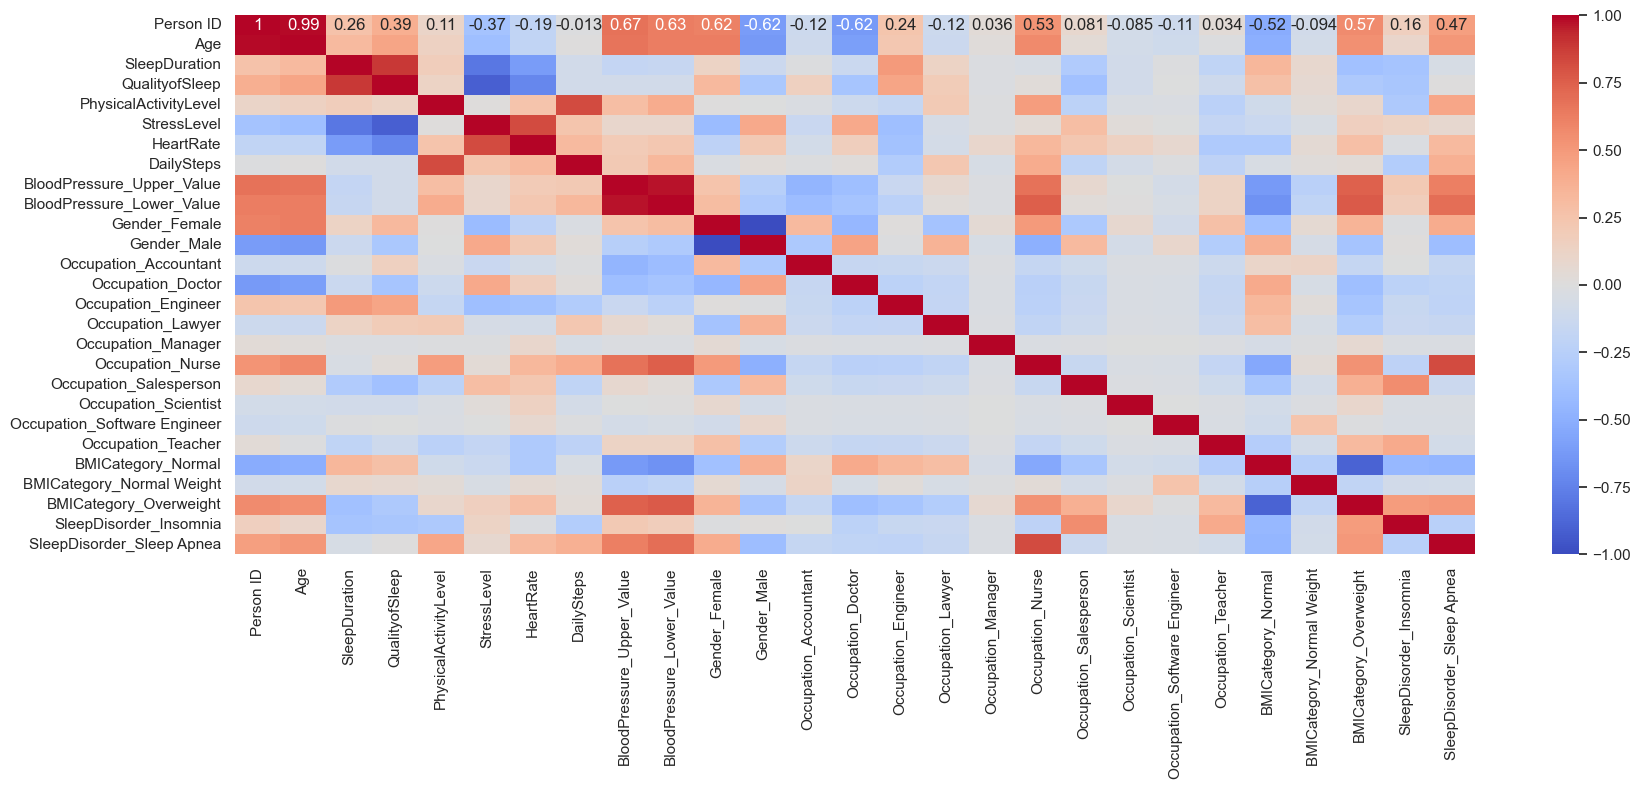

In [15]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(df3.corr(), annot=True, cmap="coolwarm")

OLS regression and residual plot to check for collinear variables

                            OLS Regression Results                            
Dep. Variable:         QualityofSleep   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     529.5
Date:                Mon, 19 Feb 2024   Prob (F-statistic):          1.02e-226
Time:                        22:06:25   Log-Likelihood:                 19.983
No. Observations:                 359   AIC:                            -7.967
Df Residuals:                     343   BIC:                             54.17
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

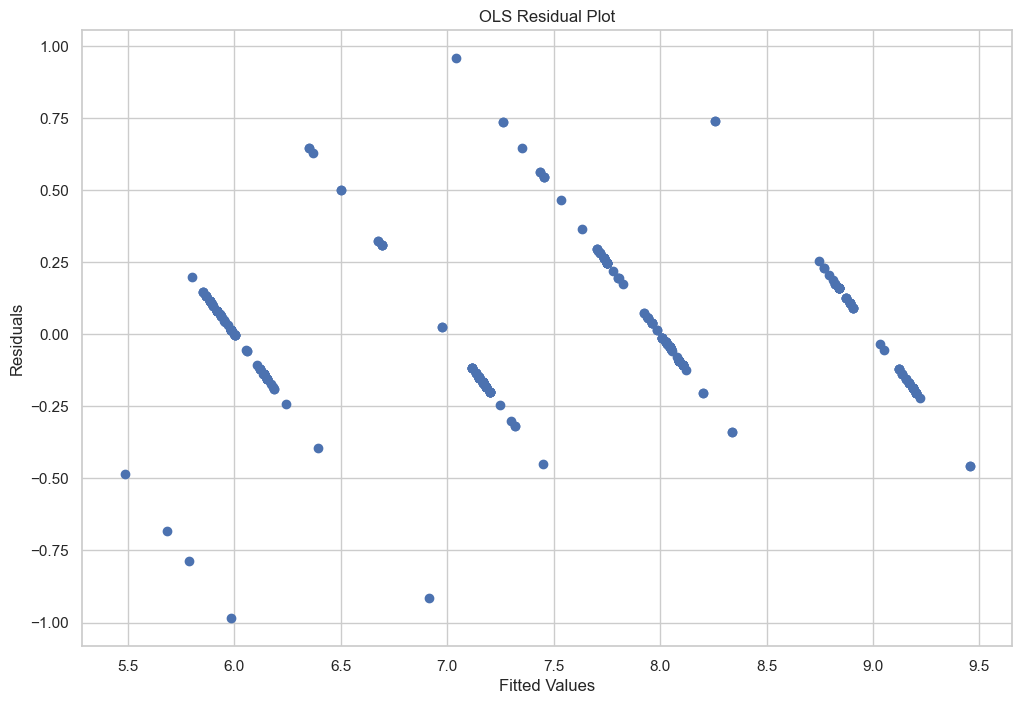

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define independent variables (X) and dependent variable (y)
X = df3[['Age', 'SleepDuration', 'PhysicalActivityLevel', 'StressLevel', 'HeartRate', 'DailySteps',
        'Occupation_Nurse', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher',
        'BMICategory_Normal', 'BMICategory_Normal Weight', 'BMICategory_Overweight',
        'SleepDisorder_Insomnia', 'SleepDisorder_Sleep Apnea']]
y = df3['QualityofSleep']

# Add constant term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

# Plot the OLS regression results
plt.figure(figsize=(12, 8))
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('OLS Residual Plot')
plt.show()

Variance Inflation Factor - quantify multicollinearity in a set of predictor variables. Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated with each other, which can lead to unreliable and unstable estimates.
A high VIF value (usually greater than 10) indicates that the predictor variable is highly correlated with other 
predictor variables in the model, and this high correlation is causing instability in the estimation of regression 
coefficients. In such cases, it may be necessary to address multicollinearity by either removing one of the 
correlated variables or using techniques such as ridge regression or principal component analysis (PCA) to 
mitigate its effects.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant term to the predictor variables
X = add_constant(df3[['Age', 'SleepDuration', 'PhysicalActivityLevel', 'StressLevel', 'HeartRate', 'DailySteps',
                     'Occupation_Nurse', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher',
                     'BMICategory_Normal', 'BMICategory_Normal Weight', 'BMICategory_Overweight',
                     'SleepDisorder_Insomnia', 'SleepDisorder_Sleep Apnea']])

# Compute VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                        Variable       VIF
0                          const  0.000000
1                            Age  4.088791
2                  SleepDuration  6.009550
3          PhysicalActivityLevel  5.533621
4                    StressLevel  9.490701
5                      HeartRate  6.710604
6                     DailySteps  4.762817
7               Occupation_Nurse  6.106164
8         Occupation_Salesperson  2.697987
9           Occupation_Scientist  1.266610
10  Occupation_Software Engineer  1.190799
11            Occupation_Teacher  3.154471
12            BMICategory_Normal       inf
13     BMICategory_Normal Weight       inf
14        BMICategory_Overweight       inf
15        SleepDisorder_Insomnia  3.079115
16     SleepDisorder_Sleep Apnea  3.866194


/Users/diviyabharrathi/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/diviyabharrathi/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


None of my dependent variables are highly collinear. I have still performed ridge regression beacause my dataset is small and ridge regression can help mitigate the risk of overfitting by adding a penalty term to the least squares objective function. 

In [19]:
from sklearn.model_selection import train_test_split

X = df3[['Age', 'SleepDuration', 'PhysicalActivityLevel', 'StressLevel',
       'HeartRate', 'DailySteps', 'Occupation_Nurse', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Teacher', 'SleepDisorder_Insomnia', 'SleepDisorder_Sleep Apnea']]

y = df3['QualityofSleep']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
from sklearn.linear_model import Ridge

# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

Cleaned dataset exported to a csv file

In [22]:
df3.to_csv('classautocheck1.csv', index=False)

H2O initialization and execution

In [23]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [24]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [25]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [26]:
min_mem_size=6 
run_time=222

In [27]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

1


In [28]:
port_no=random.randint(5555,55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:15458..... not found.
Attempting to start a local H2O server...
  Java Version: java version "21.0.2" 2024-01-16 LTS; Java(TM) SE Runtime Environment (build 21.0.2+13-LTS-58); Java HotSpot(TM) 64-Bit Server VM (build 21.0.2+13-LTS-58, mixed mode, sharing)
  Starting server from /Users/diviyabharrathi/anaconda3/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/_5/8gxwk_ms6js9pvyn9yd_fx780000gn/T/tmpjs2qa3x1
  JVM stdout: /var/folders/_5/8gxwk_ms6js9pvyn9yd_fx780000gn/T/tmpjs2qa3x1/h2o_diviyabharrathi_started_from_python.out
  JVM stderr: /var/folders/_5/8gxwk_ms6js9pvyn9yd_fx780000gn/T/tmpjs2qa3x1/h2o_diviyabharrathi_started_from_python.err
  Server is running at http://127.0.0.1:15458
Connecting to H2O server at http://127.0.0.1:15458 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_diviyabharrathi_d86b1m
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.984 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [29]:
url = 'classautocheck1.csv'
df5 = h2o.import_file(url)
df5.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Person ID,Age,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,HeartRate,DailySteps,BloodPressure_Upper_Value,BloodPressure_Lower_Value,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMICategory_Normal,BMICategory_Normal Weight,BMICategory_Overweight,SleepDisorder_Insomnia,SleepDisorder_Sleep Apnea
1,27,6.1,6,42,6,77,4200,126,83,False,True,False,0,False,False,False,0,0,0,1,0,0,0,1,0,0
2,28,6.2,6,60,8,75,10000,125,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
3,28,6.2,6,60,8,75,10000,125,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
8,29,7.8,7,75,6,70,8000,120,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
9,29,7.8,7,75,6,70,8000,120,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
10,29,7.8,7,75,6,70,8000,120,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
11,29,6.1,6,30,8,70,8000,120,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
12,29,7.8,7,75,6,70,8000,120,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
13,29,6.1,6,30,8,70,8000,120,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
14,29,6,6,30,8,70,8000,120,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0


In [30]:
df5

Person ID,Age,SleepDuration,QualityofSleep,PhysicalActivityLevel,StressLevel,HeartRate,DailySteps,BloodPressure_Upper_Value,BloodPressure_Lower_Value,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMICategory_Normal,BMICategory_Normal Weight,BMICategory_Overweight,SleepDisorder_Insomnia,SleepDisorder_Sleep Apnea
1,27,6.1,6,42,6,77,4200,126,83,False,True,False,0,False,False,False,0,0,0,1,0,0,0,1,0,0
2,28,6.2,6,60,8,75,10000,125,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
3,28,6.2,6,60,8,75,10000,125,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
8,29,7.8,7,75,6,70,8000,120,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
9,29,7.8,7,75,6,70,8000,120,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
10,29,7.8,7,75,6,70,8000,120,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
11,29,6.1,6,30,8,70,8000,120,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
12,29,7.8,7,75,6,70,8000,120,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
13,29,6.1,6,30,8,70,8000,120,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0
14,29,6,6,30,8,70,8000,120,80,False,True,False,1,False,False,False,0,0,0,0,0,1,0,0,0,0


In [31]:
df5.shape

(359, 27)

In [32]:
import h2o
import shap
import matplotlib.pyplot as plt
from h2o.automl import H2OAutoML

#Split the data into training and testing sets
train, test = df5.split_frame(ratios=[0.8], seed=1234)

# Specify the features (X) and target variable (y)
X = df5.columns[:-1]
y = "QualityofSleep"  

# Convert the target variable to categorical
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Initialize and train AutoML for classification
aml = H2OAutoML(max_runtime_secs = 400, seed = 1, project_name = "classificaition")
aml.train(x = X, y = y, training_frame = train)


AutoML progress: |
22:07:28.718: AutoML: XGBoost is not available; skipping it.
22:07:28.733: _train param, Dropping bad and constant columns: [Occupation_Manager]
22:07:28.840: GLM_1_AutoML_1_20240219_220728 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: Index 29 out of bounds for length 29
22:07:28.843: _train param, Dropping bad and constant columns: [Occupation_Manager]

█
22:07:29.765: _train param, Dropping bad and constant columns: [Occupation_Manager]


22:07:30.68: _train param, Dropping bad and constant columns: [Occupation_Manager]

███
22:07:31.834: _train param, Dropping bad and constant columns: [Occupation_Manager]

█
22:07:32.527: _train param, Dropping bad and constant columns: [Occupation_Manager]

██
22:07:33.399: _train param, Dropping unused columns: [Occupation_Manager]

█
22:07:33.844: _train param, Dropping unused columns: [Occupation_Manager]
22:07:34.293: _train param, Dropping bad and constant columns: [Occupation_Manager]
22:07:34.466: _train 

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20240219_220728_model_220


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    89                 445                         101135                 2            10           6.96404       3             17            13.4921

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 4.972697901214736e-09
RMSE: 7.051735886442952e-05
LogLoss: 2.222595223379861e-05
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
5    6    7    8    9    Error    Rate
---  ---  ---  ---  ---  -------  -------
4    0    0    0    0    0        0 / 4
0    84   0    0    0    0        0 / 84
0    0    55   0    0    0        0 / 55
0    0    0    90   0    0        0 / 90
0    0    0    0    55   0        0 / 55
4    84   55   90   55   0        0 / 288

Top-5 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1
4    1
5    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.008691278271974448
RMSE: 0.0932270254377691
LogLoss: 0.03925012803373643
Mean Per-Class Error: 0.006017316017316017
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
5    6    7    8    9    Error       Rate
---  ---  ---  ---  ---  ----------  -------
4    0    0    0    0    0           0 / 4
0    83   1    0    0    0.0119048   1 / 84
0    1    54   0    0    0.0181818   1 / 55
0    0    0    90   0    0           0 / 90
0    0    0    0    55   0           0 / 55
4    84   55   90   55   0.00694444  2 / 288

Top-5 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.993056
2    0.993056
3    1
4    1
5    1

Cross-Validation Metrics Summary: 
                         mean        sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ----------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.989595    0.00949952  1             0.982759      0.982759      1             0.982456
auc                      nan         0           nan           nan           nan           nan           nan
err                      0.0104053   0.00949952  0             0.0172414     0.0172414     0             0.0175439
err_count                0.6         0.547723    0             1             1             0             1
logloss                  0.0458648   0.04667     0.0209798     0.0165574     0.0877903     3.09771e-05   0.103965
max_per_class_error      0.0410576   0.0399451   0             0.0555556     0.0909091     0             0.0588235
mean_per_class_accuracy  0.991788    0.00798902  1             0.988889      0.981818      1             0.988235
mean_per_class_error     0.00821153  0.00798902  0             0.0111111     0.0181818     0             0.0117647
mse                      0.00967139  0.00756521  0.00713073    0.0064749     0.0173006     5.38336e-08   0.0174507
pr_auc                   nan         0    

The values in columns p5, p6, p7, p8, p9 represent the predicted probabilities 
of each class label for the observation.

In [35]:
predictions = aml.leader.predict(test)
print(predictions)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
  predict           p5           p6           p7           p8           p9
        7  6.49094e-06  2.16687e-06  0.999989     1.52554e-06  6.86031e-07
        6  5.3994e-06   0.999984     6.48624e-06  3.87492e-06  3.13881e-07
        7  6.49094e-06  2.16687e-06  0.999989     1.52554e-06  6.86031e-07
        7  6.49094e-06  2.16687e-06  0.999989     1.52554e-06  6.86031e-07
        7  6.49094e-06  2.16687e-06  0.999989     1.52554e-06  6.86031e-07
        7  6.49094e-06  2.16687e-06  0.999989     1.44643e-06  6.86031e-07
        7  6.49094e-06  2.16687e-06  0.999989     1.52554e-06  6.86031e-07
        7  6.49094e-06  2.16687e-06  0.999989     1.44643e-06  6.86031e-07
        7  0.000214431  0.000573252  0.833245     0.165673     0.000294252
        6  1.10838e-05  0.999987     5.2503e-07   1.06448e-06  2.04329e-07
[71 rows x 6 columns]



In [37]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head() 

model_id,mean_per_class_error,logloss,rmse,mse
GBM_grid_1_AutoML_1_20240219_220728_model_220,0.00601732,0.0392501,0.093227,0.00869128
GBM_grid_1_AutoML_1_20240219_220728_model_173,0.00601732,0.0287731,0.0857645,0.00735556
GBM_grid_1_AutoML_1_20240219_220728_model_113,0.00601732,0.0276788,0.0892031,0.0079572
GBM_grid_1_AutoML_1_20240219_220728_model_67,0.00601732,0.022595,0.0807776,0.00652501
GBM_grid_1_AutoML_1_20240219_220728_model_28,0.00601732,0.0309033,0.0934514,0.00873317
GBM_grid_1_AutoML_1_20240219_220728_model_132,0.00601732,0.0310856,0.0940193,0.00883963
GBM_grid_1_AutoML_1_20240219_220728_model_82,0.00601732,0.0265389,0.0865256,0.00748668
GBM_grid_1_AutoML_1_20240219_220728_model_37,0.00601732,0.0360083,0.0943514,0.00890218
GBM_grid_1_AutoML_1_20240219_220728_model_207,0.00601732,0.0283975,0.086645,0.00750736
GBM_grid_1_AutoML_1_20240219_220728_model_72,0.00601732,0.0273169,0.0887098,0.00786942


In [38]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.021712523418280925
RMSE: 0.14735169974683335
LogLoss: 0.06088467155259966
Mean Per-Class Error: 0.020526315789473684
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
5    6    7    8    9    Error      Rate
---  ---  ---  ---  ---  ---------  ------
0    0    0    0    0    nan        0 / 0
0    19   0    1    0    0.05       1 / 20
0    0    18   0    0    0          0 / 18
0    0    1    18   0    0.0526316  1 / 19
0    0    0    0    14   0          0 / 14
0    19   19   19   14   0.028169   2 / 71

Top-5 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.971831
2    0.985915
3    1
4    1
5    1

In [55]:
# Accessing the best model
best_model = aml.leader

# Accessing the hyperparameters of the best model
best_model_params = best_model.params

# Printing the hyperparameters
print("Hyperparameters of the best model:")
for param_name, param_value in best_model_params.items():
    print(f"{param_name}: {param_value['actual']}")

Hyperparameters of the best model:
model_id: {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_1_20240219_220728_model_220', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_1_20240219_220728_model_220'}
training_frame: {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240219_220728_training_py_5_sid_ba97', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240219_220728_training_py_5_sid_ba97'}
validation_frame: None
nfolds: 5
keep_cross_validation_models: False
keep_cross_validation_predictions: True
keep_cross_validation_fold_assignment: False
score_each_iteration: False
score_tree_interval: 5
fold_assignment: Modulo
fold_column: None
response_column: {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'QualityofSleep', 'is_member_of_frames': None}
ignored_columns: ['SleepDisorder_Slee

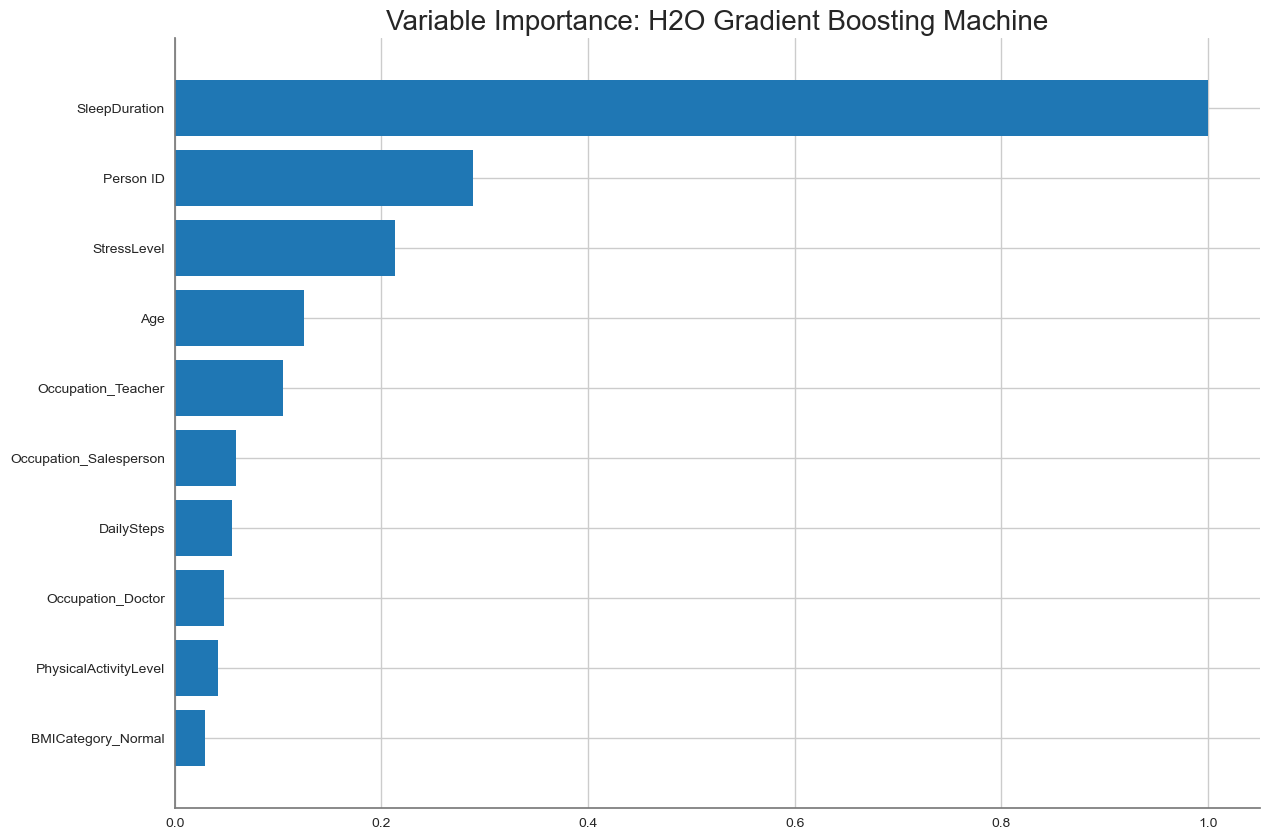

<Figure size 800x550 with 0 Axes>

In [39]:
%matplotlib inline
best_model.varimp_plot()

In [35]:
import h2o
# Get leaderboard with all possible columns
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb.head()

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20240219_211508_model_86,0.00601732,0.0356948,0.0898109,0.00806599,98,0.105787,GBM
GBM_grid_1_AutoML_1_20240219_211508_model_173,0.00601732,0.0287731,0.0857645,0.00735556,113,0.085947,GBM
GBM_grid_1_AutoML_1_20240219_211508_model_386,0.00601732,0.032008,0.0928523,0.00862154,118,0.064284,GBM
GBM_grid_1_AutoML_1_20240219_211508_model_227,0.00601732,0.0258529,0.0840202,0.0070594,135,0.05234,GBM
GBM_grid_1_AutoML_1_20240219_211508_model_194,0.00601732,0.02591,0.0894972,0.00800974,139,0.061984,GBM
GBM_grid_1_AutoML_1_20240219_211508_model_75,0.00601732,0.0348188,0.0918462,0.00843572,138,0.047871,GBM
GBM_grid_1_AutoML_1_20240219_211508_model_72,0.00601732,0.0273169,0.0887098,0.00786942,118,0.070125,GBM
GBM_grid_1_AutoML_1_20240219_211508_model_31,0.00601732,0.0300368,0.0916098,0.00839236,124,0.060506,GBM
GBM_grid_1_AutoML_1_20240219_211508_model_371,0.00601732,0.0314909,0.095675,0.0091537,116,0.060816,GBM
GBM_grid_1_AutoML_1_20240219_211508_model_330,0.00601732,0.0262646,0.0866221,0.00750339,110,0.05047,GBM


In [36]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20240219_220728_model_24,0.01,0.098692,0.118625,0.0140719,101,0.096694,GBM
GBM_grid_1_AutoML_1_20240219_220728_model_306,0.01,0.0799658,0.134855,0.0181859,309,0.093873,GBM
GBM_grid_1_AutoML_1_20240219_220728_model_26,0.01,0.0594668,0.117045,0.0136995,113,0.074115,GBM
GBM_grid_1_AutoML_1_20240219_220728_model_120,0.01,0.273066,0.208626,0.0435247,120,0.066508,GBM
GBM_grid_1_AutoML_1_20240219_220728_model_165,0.01,0.0884605,0.118861,0.014128,132,0.078695,GBM
GBM_grid_1_AutoML_1_20240219_220728_model_173,0.01,0.0787381,0.125826,0.0158323,114,0.076117,GBM
GBM_grid_1_AutoML_1_20240219_220728_model_296,0.01,0.0875343,0.122719,0.01506,175,0.08342,GBM
GBM_grid_1_AutoML_1_20240219_220728_model_193,0.01,0.0646084,0.128975,0.0166346,129,0.07237,GBM
GBM_grid_1_AutoML_1_20240219_220728_model_137,0.01,0.10175,0.118763,0.0141047,170,0.120293,GBM
GBM_grid_1_AutoML_1_20240219_220728_model_182,0.01,0.0781275,0.119633,0.014312,89,0.05822,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20240219_220728_model_220

5,6,7,8,9,Error,Rate
0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,19.0,0.0,1.0,0.0,0.05,1 / 20
0.0,0.0,18.0,0.0,0.0,0.0,0 / 18
0.0,0.0,1.0,18.0,0.0,0.0526316,1 / 19
0.0,0.0,0.0,0.0,14.0,0.0,0 / 14
0.0,19.0,19.0,19.0,14.0,0.0281690,2 / 71


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

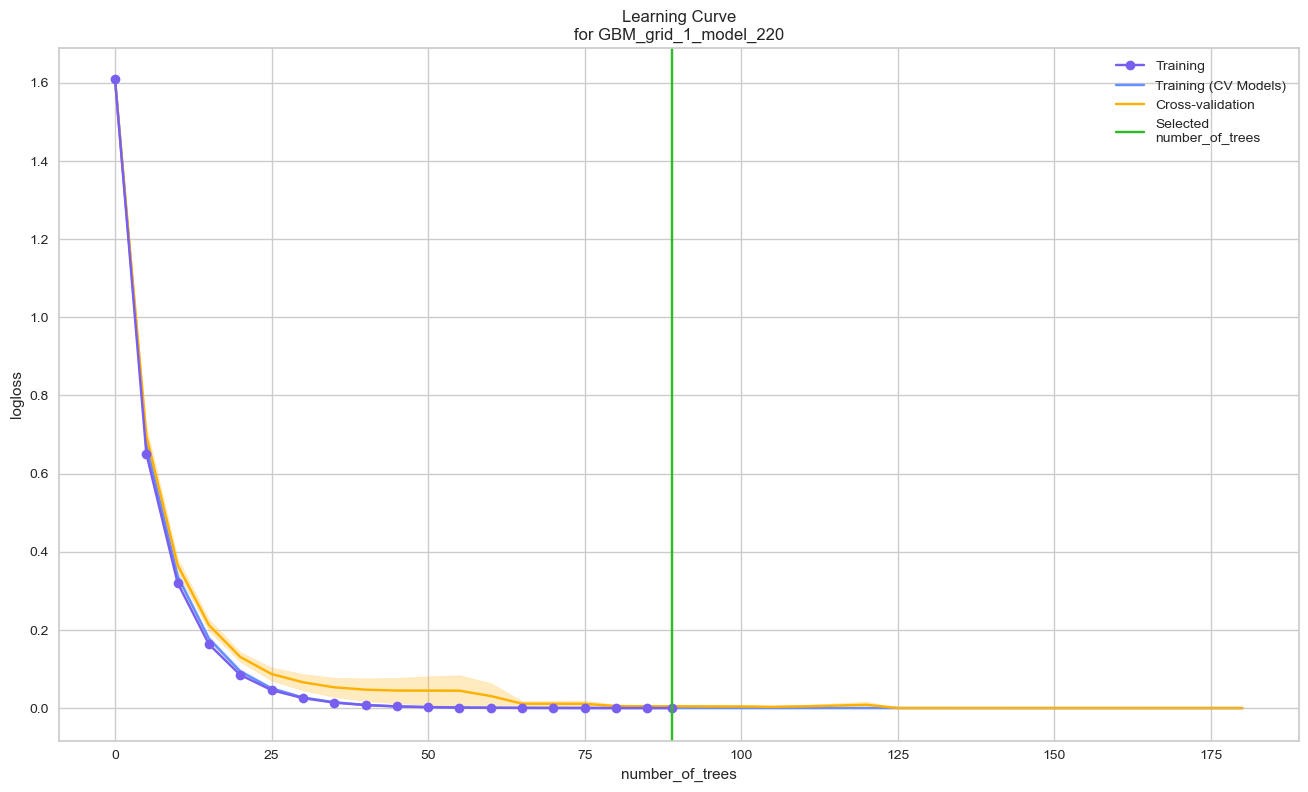

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

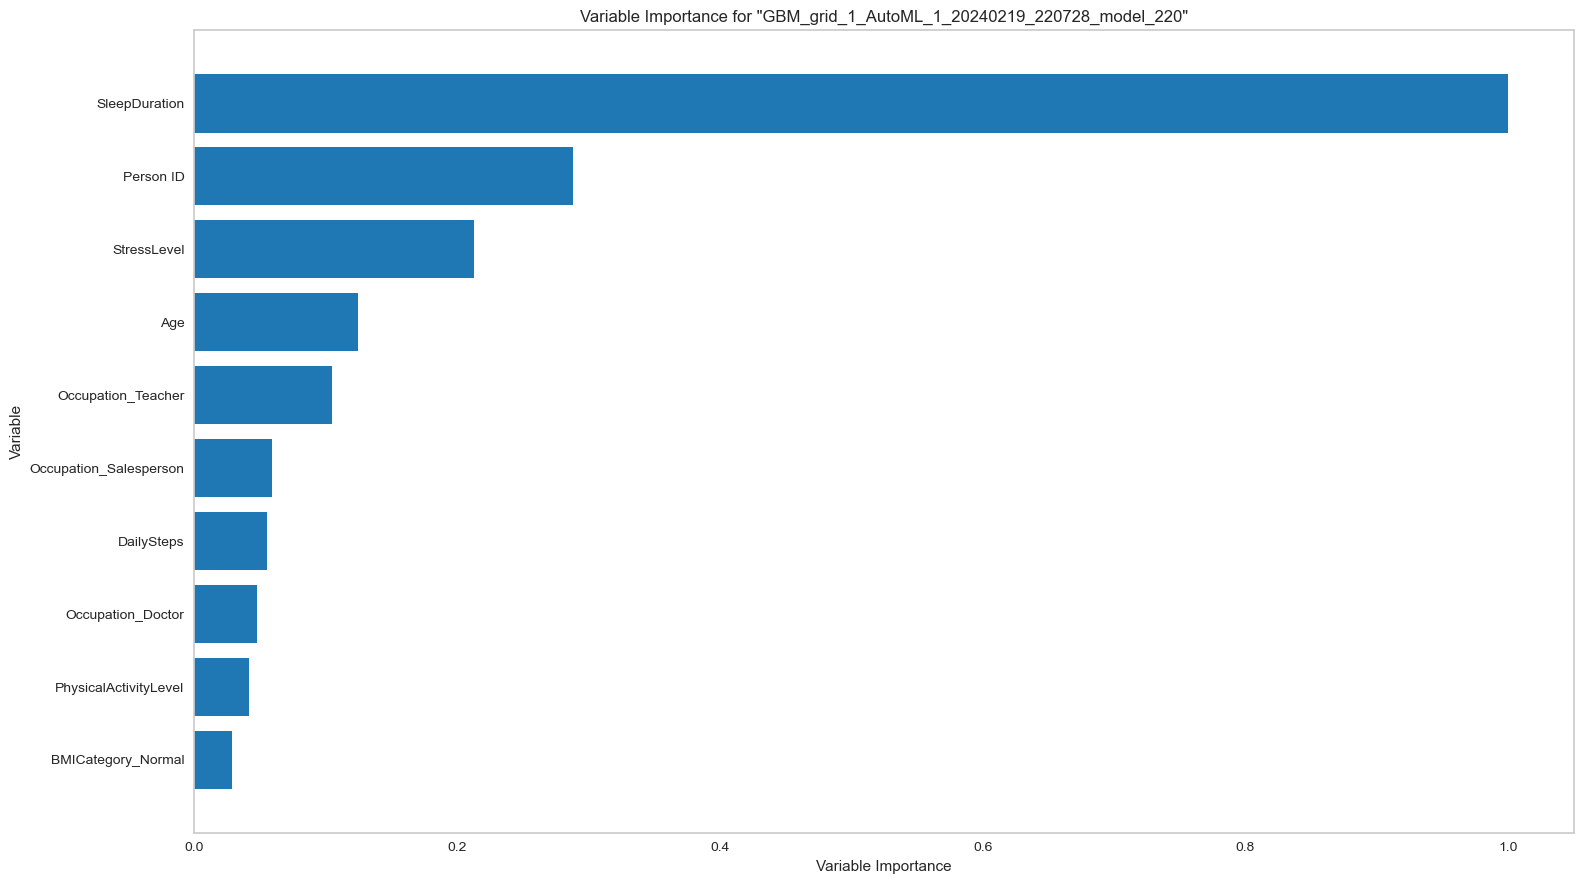

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

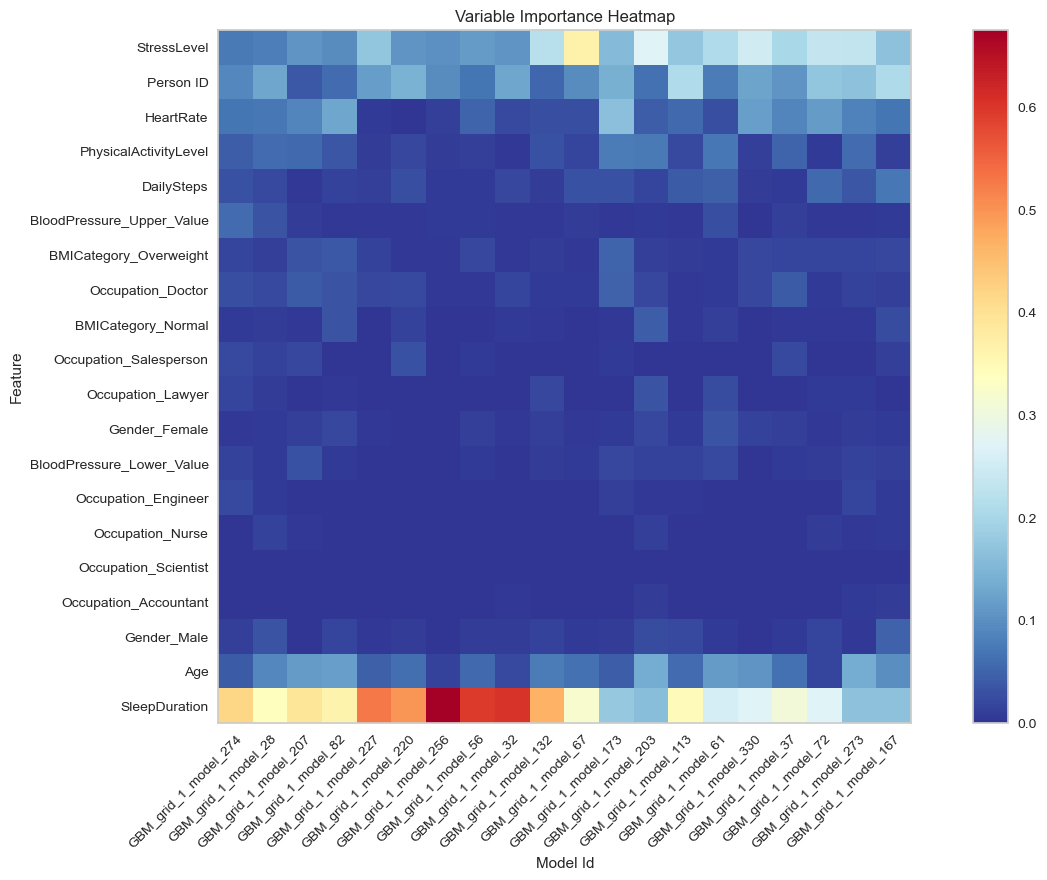

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

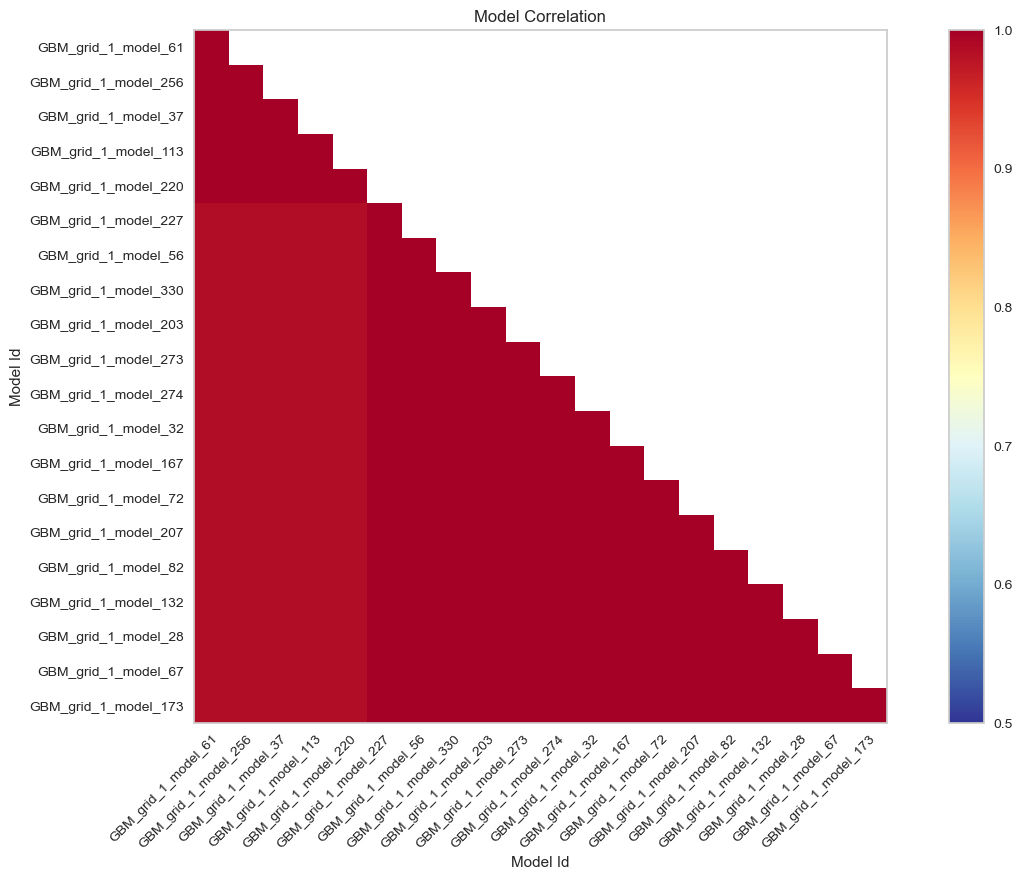

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

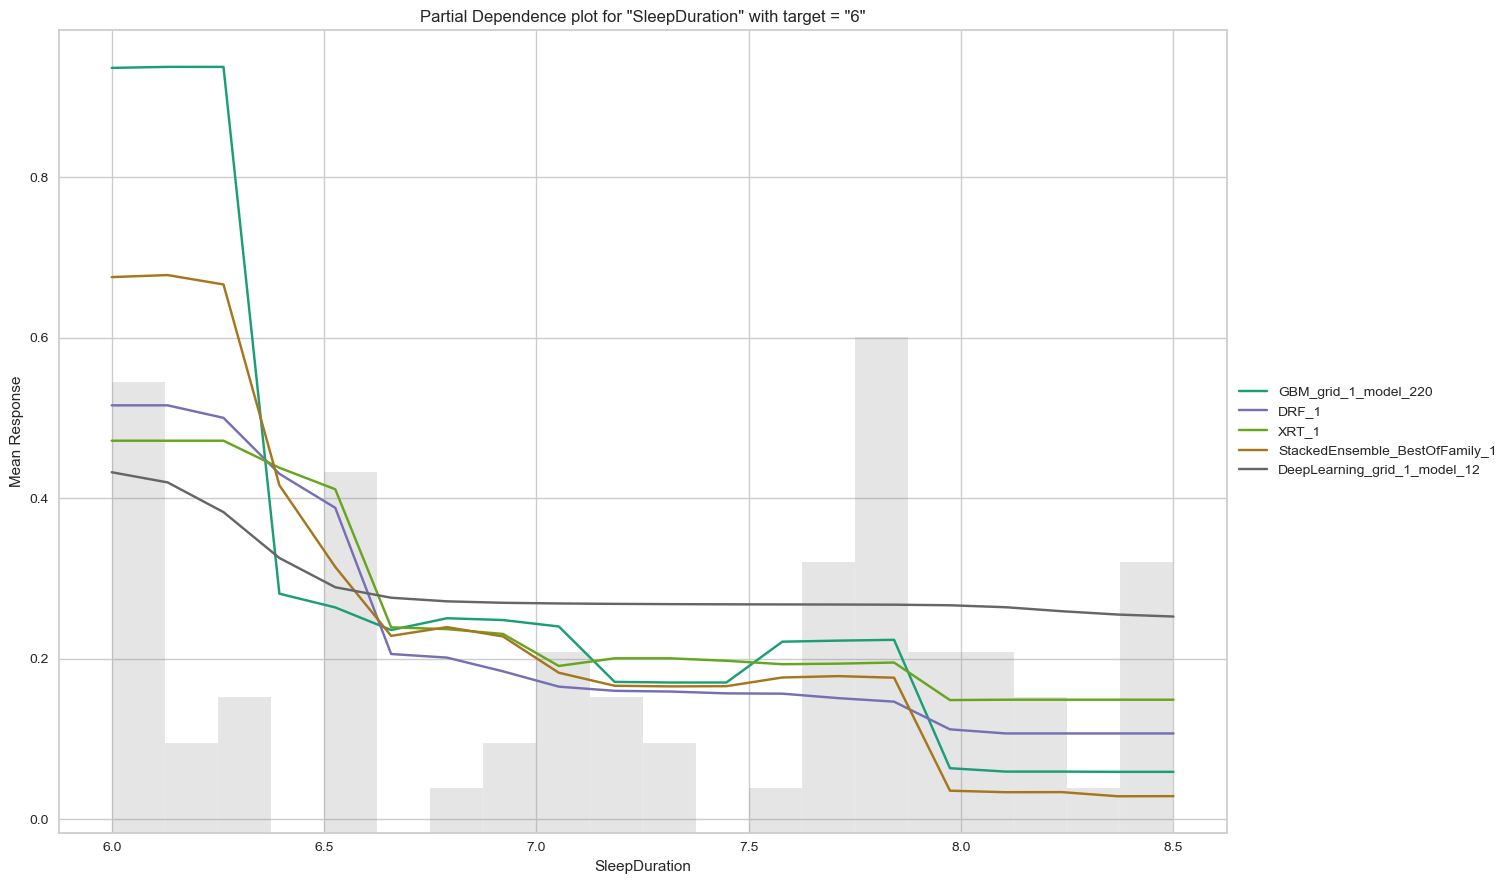

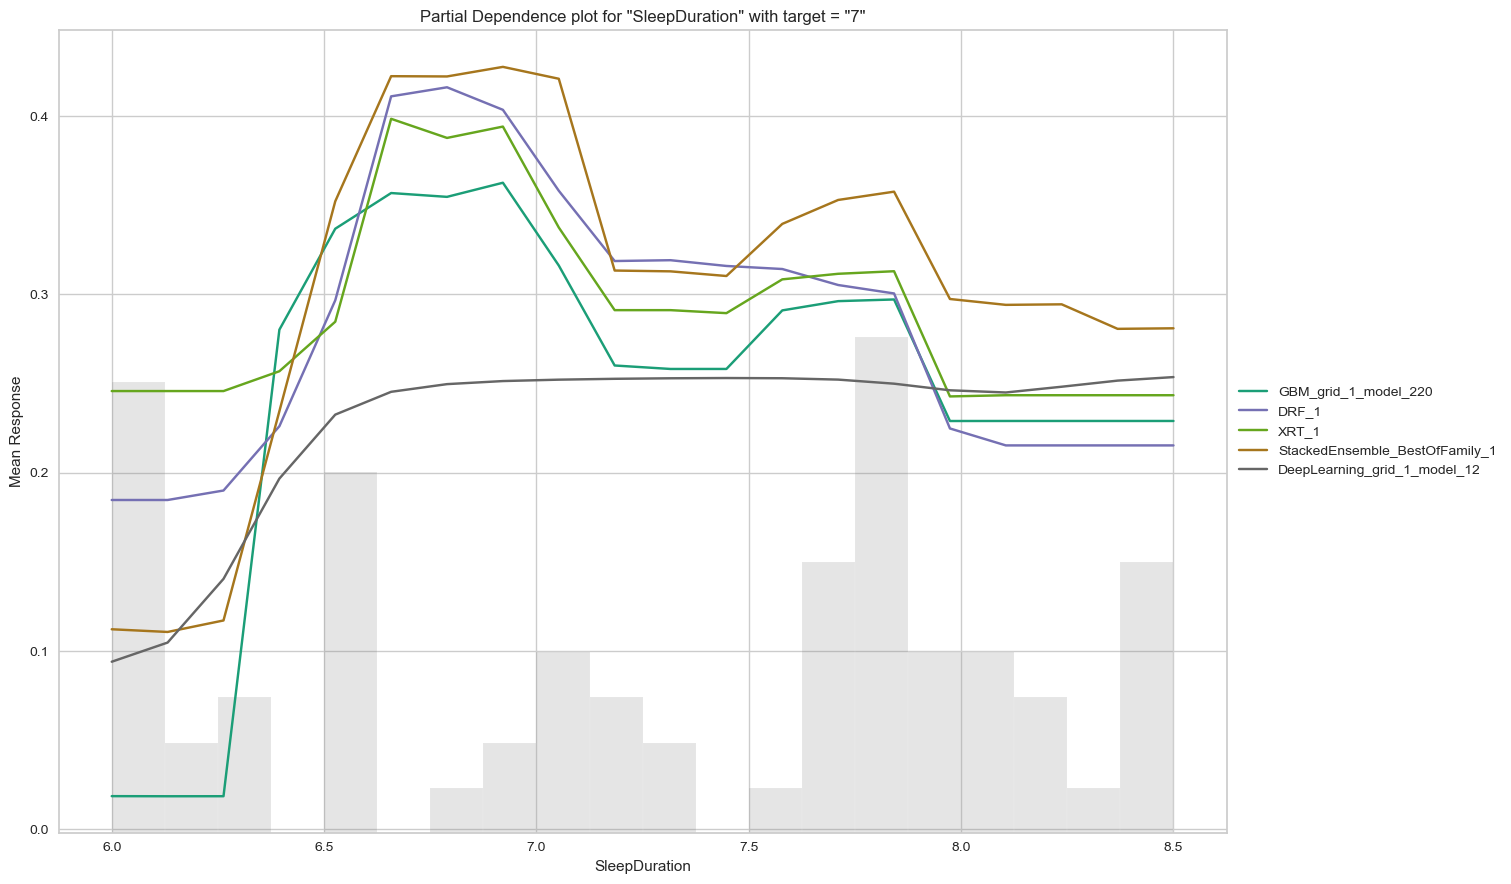

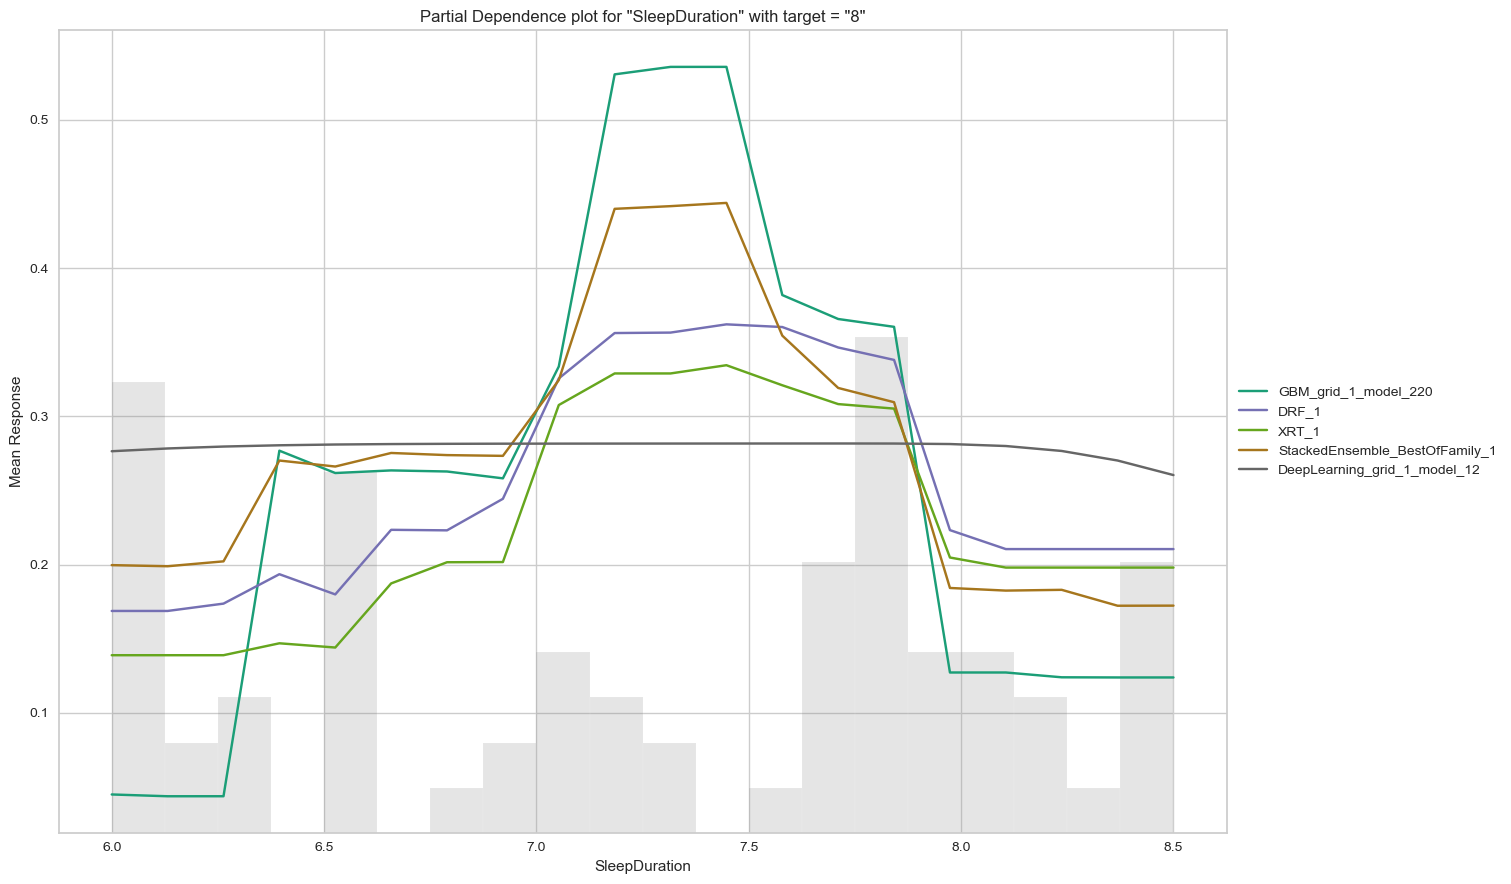

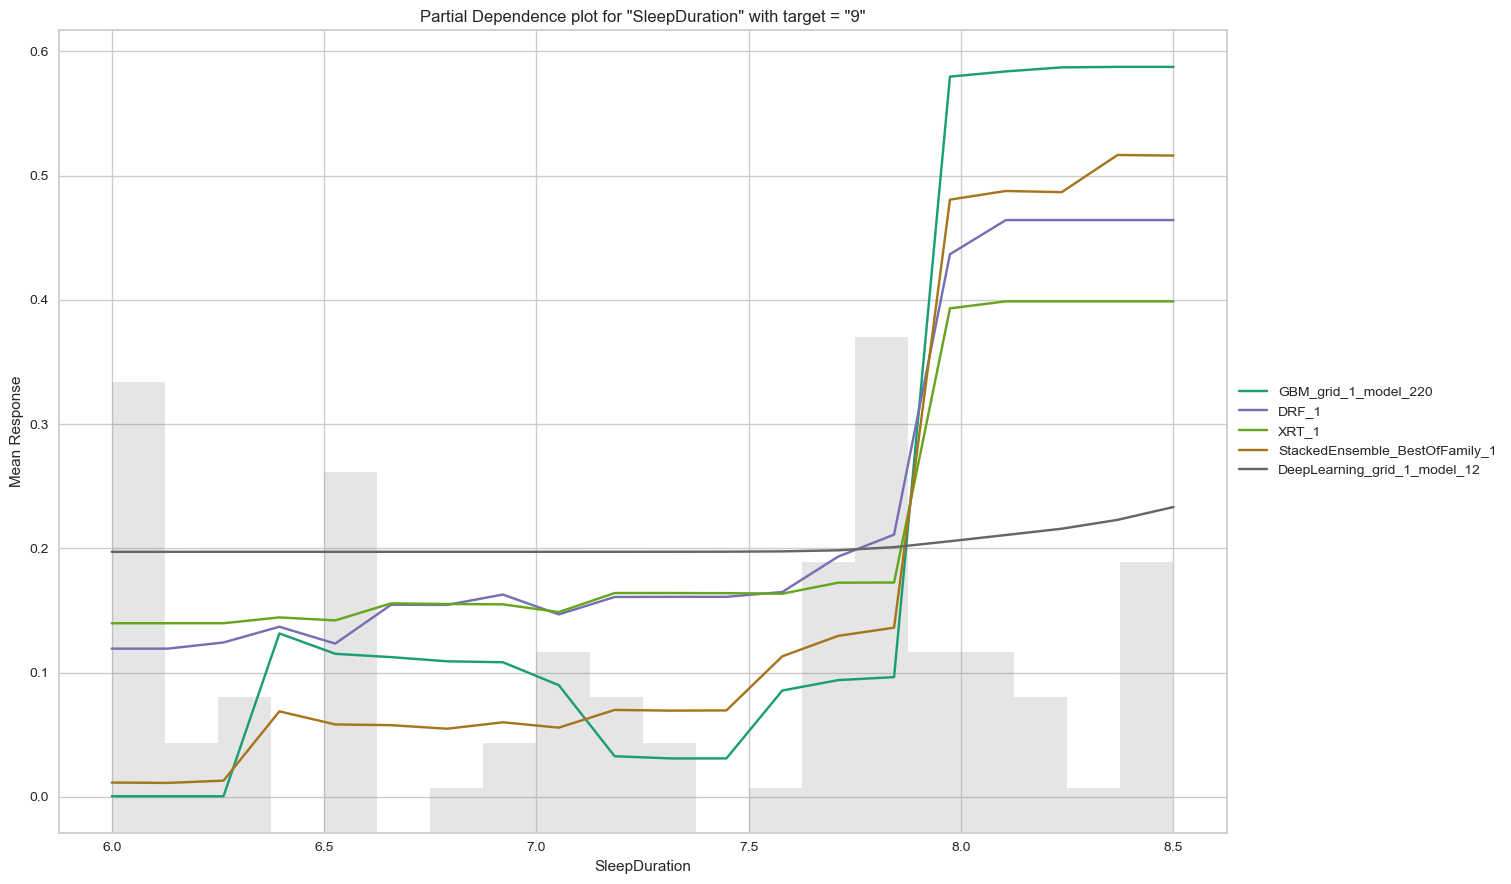

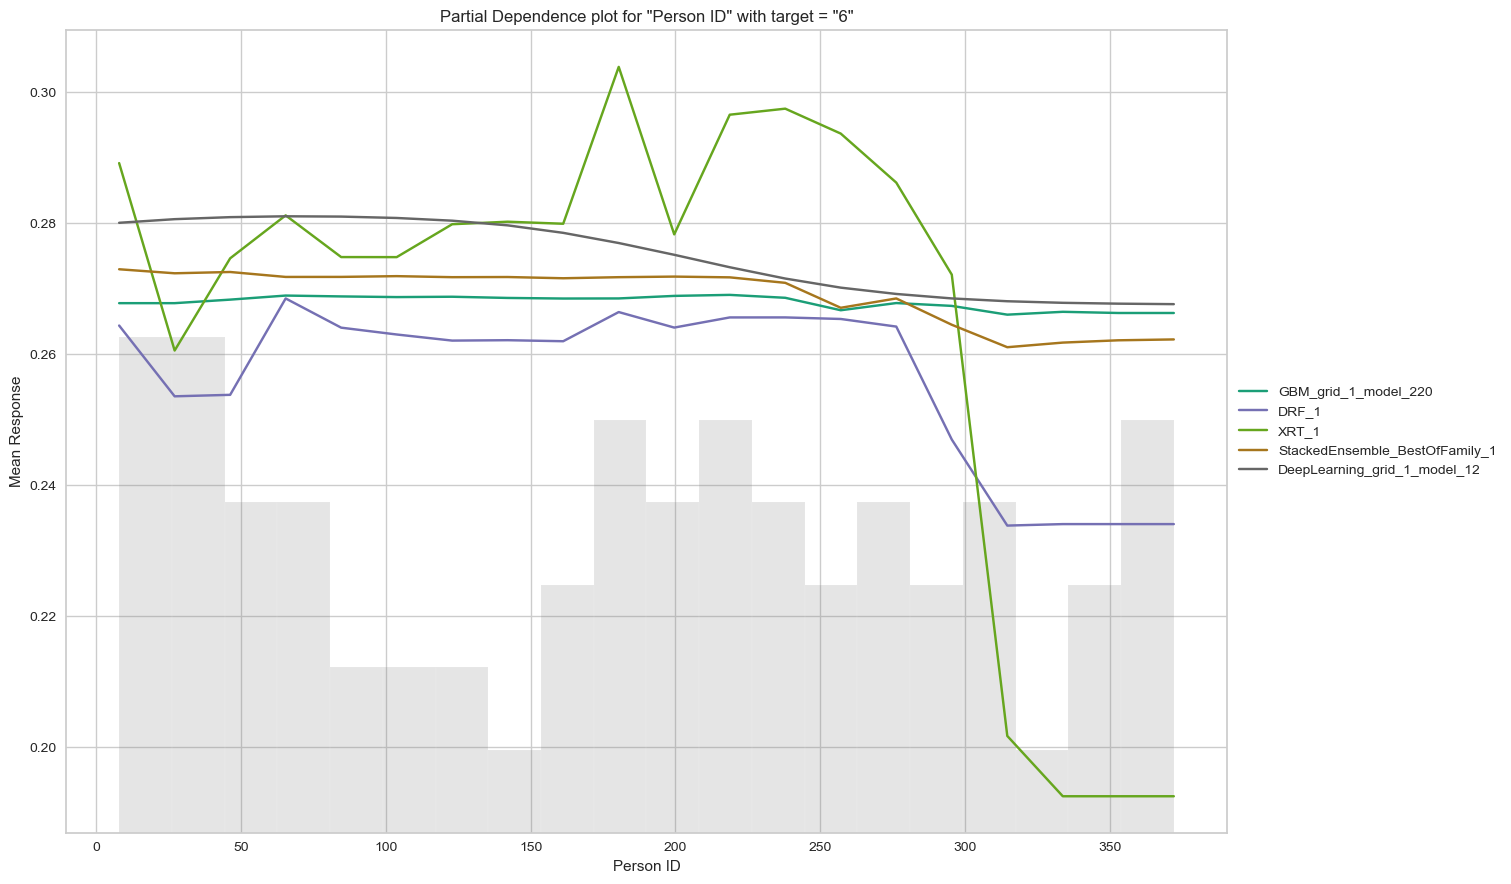

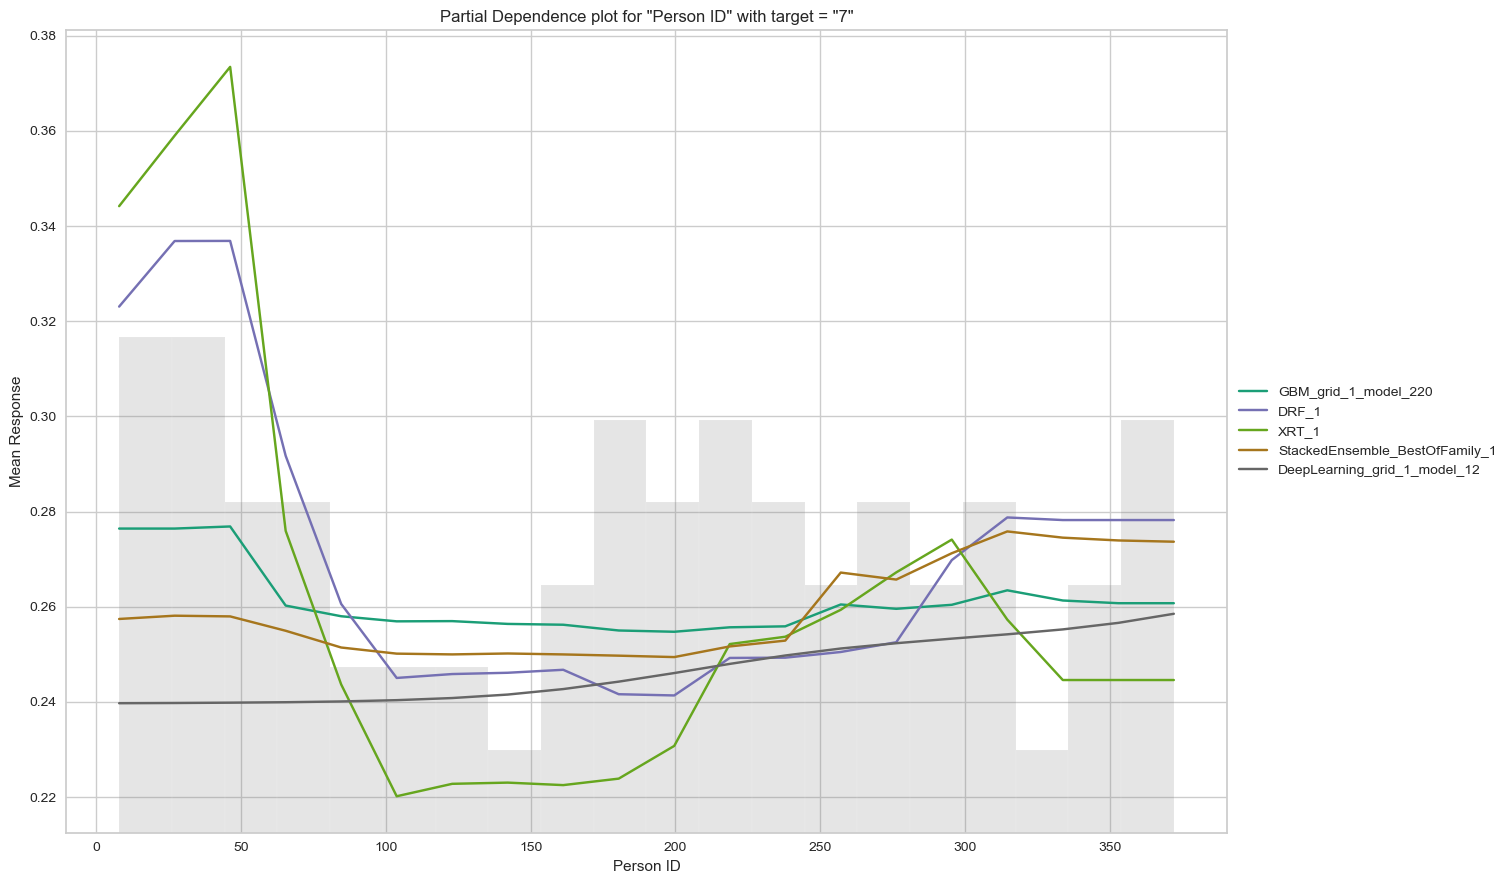

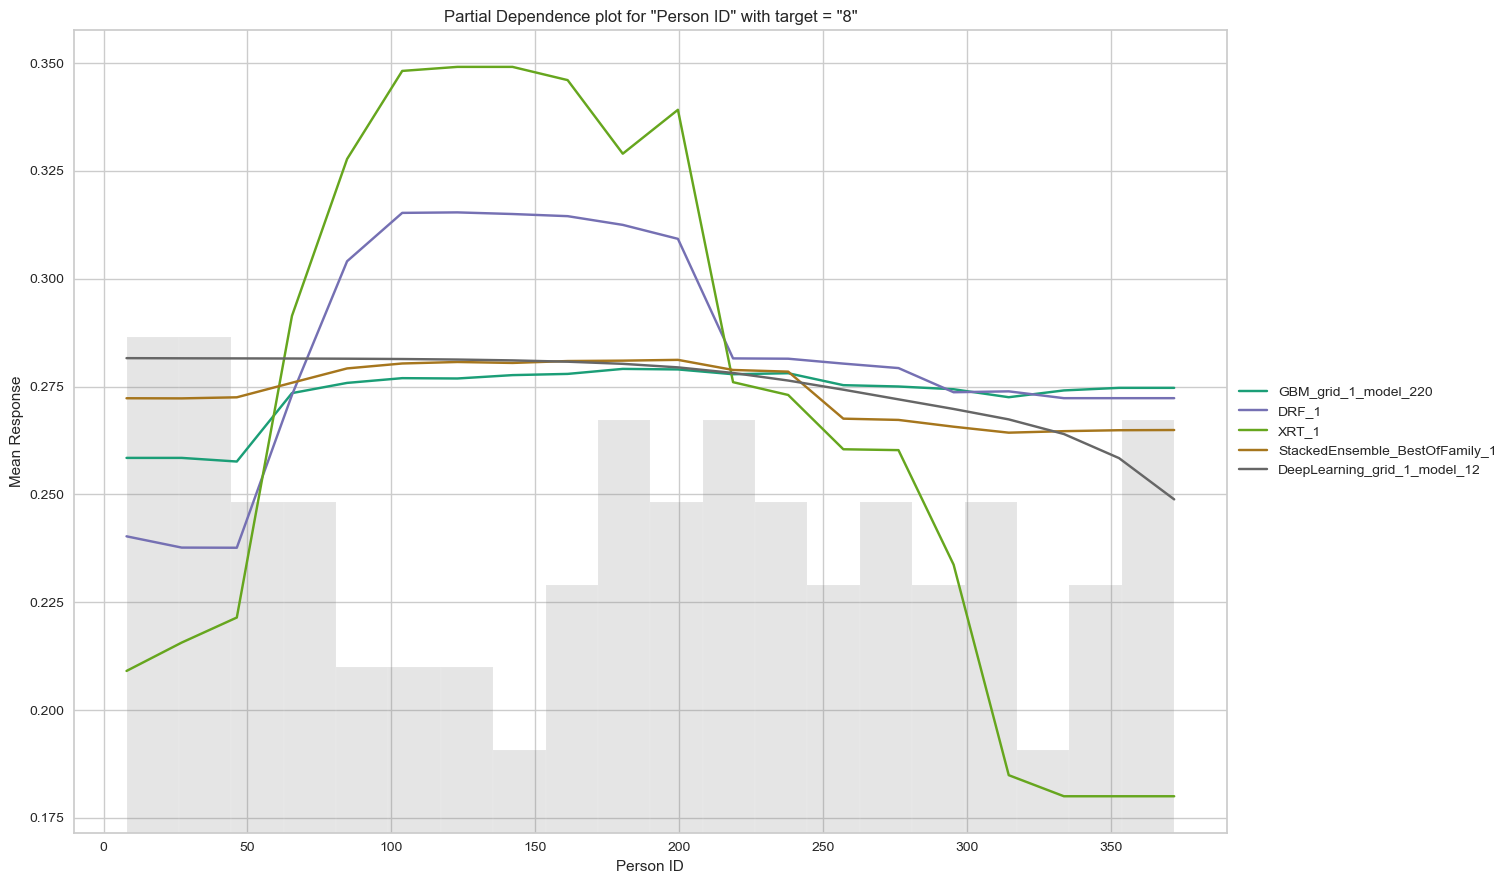

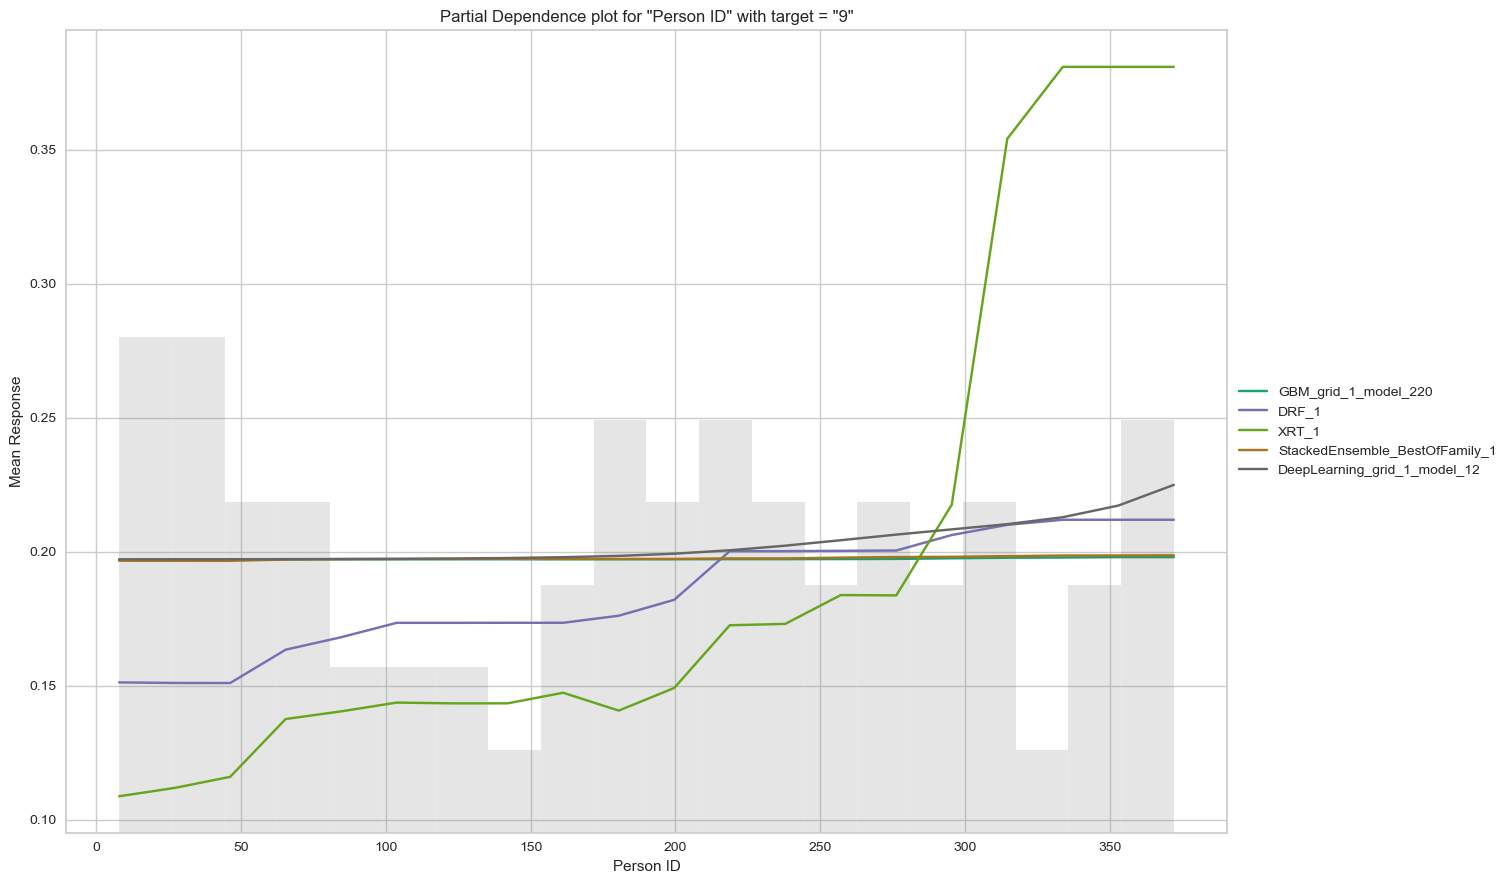

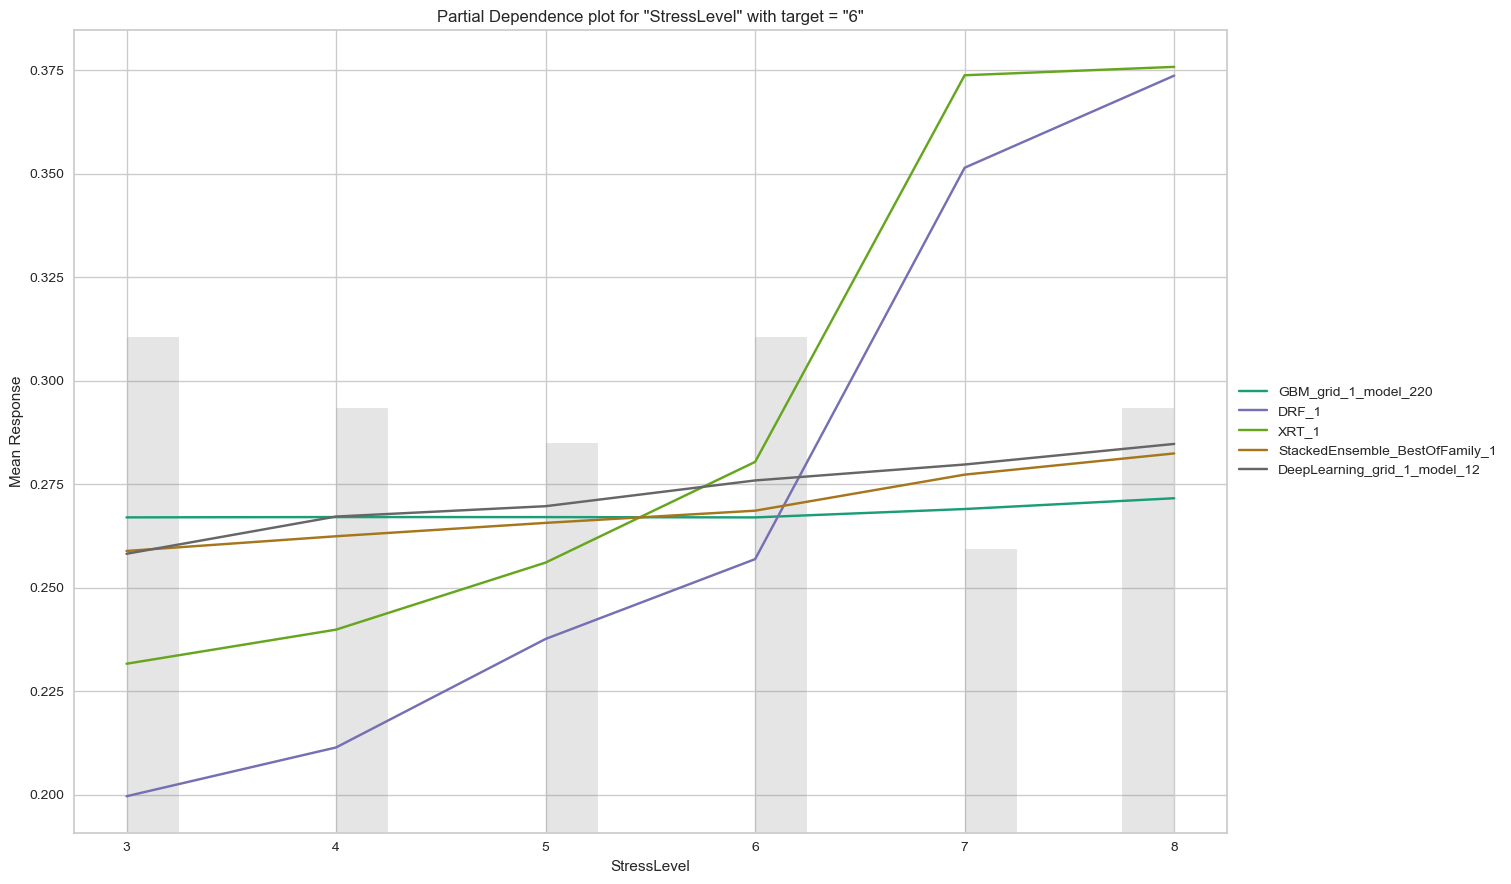

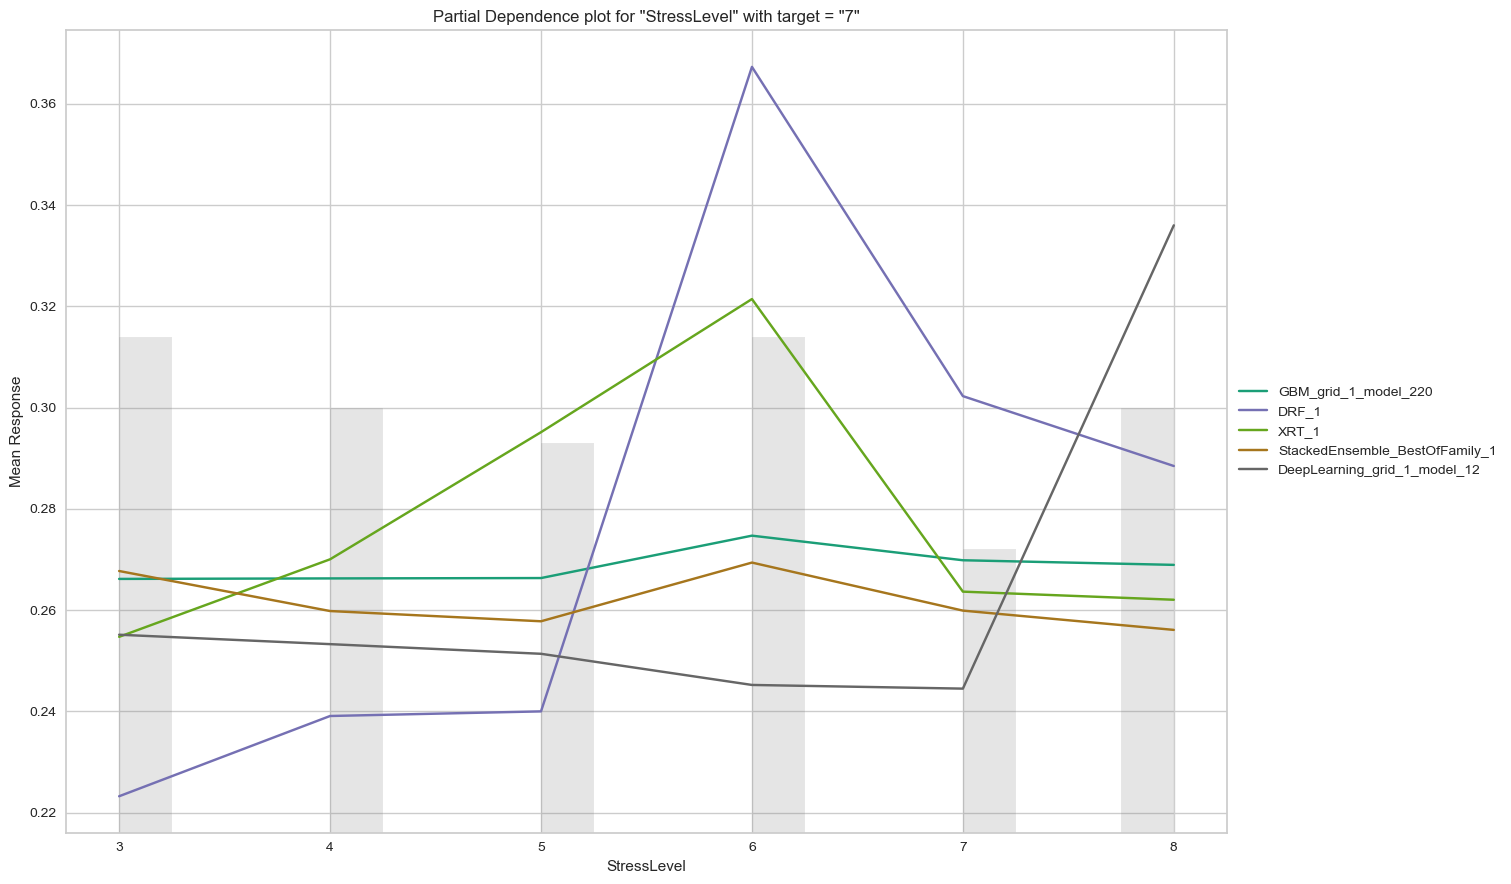

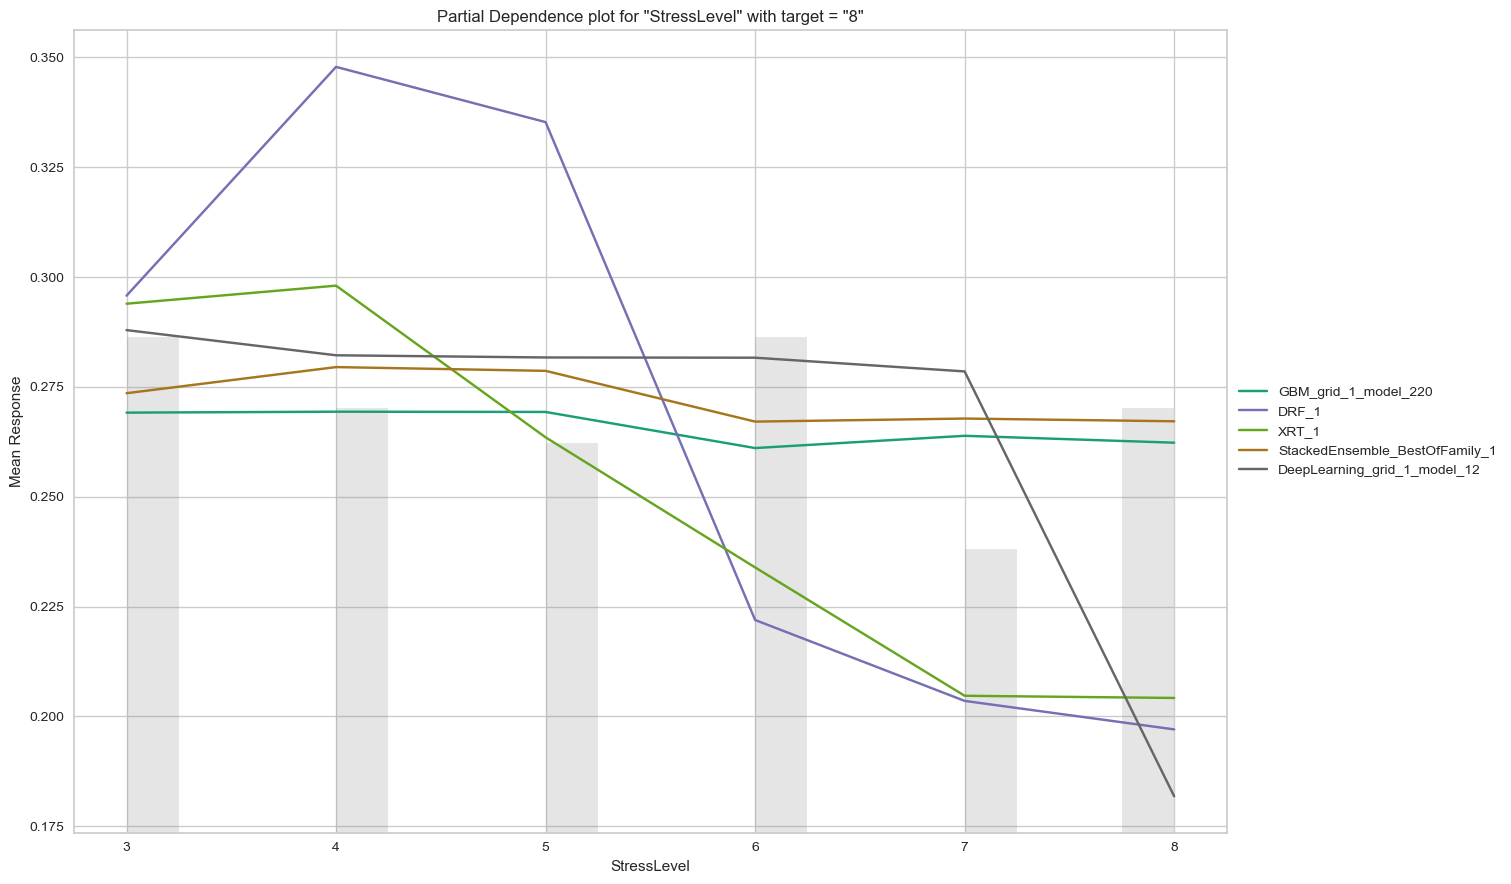

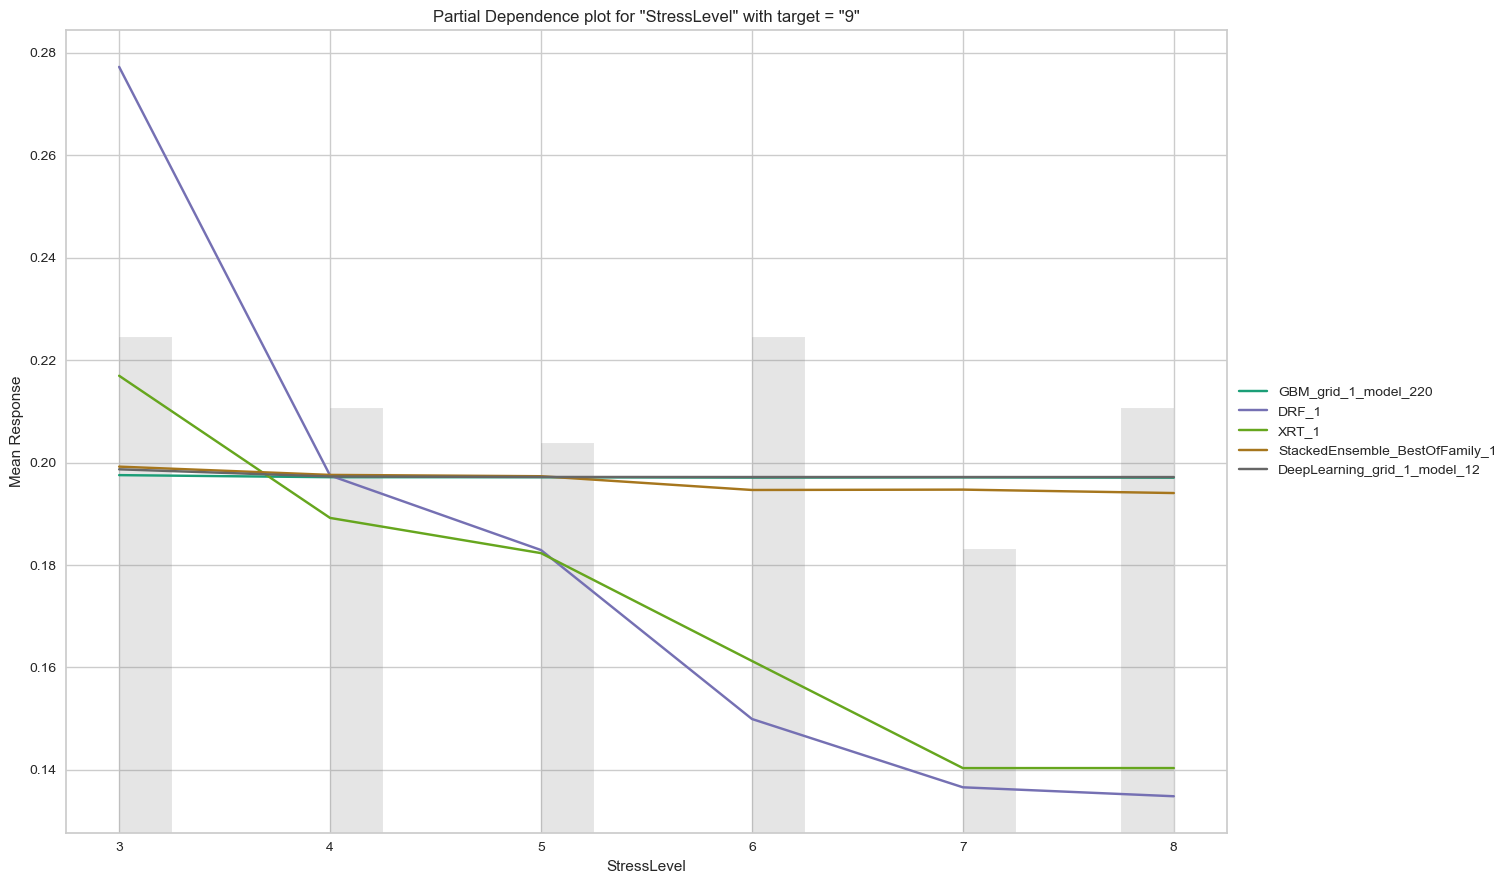

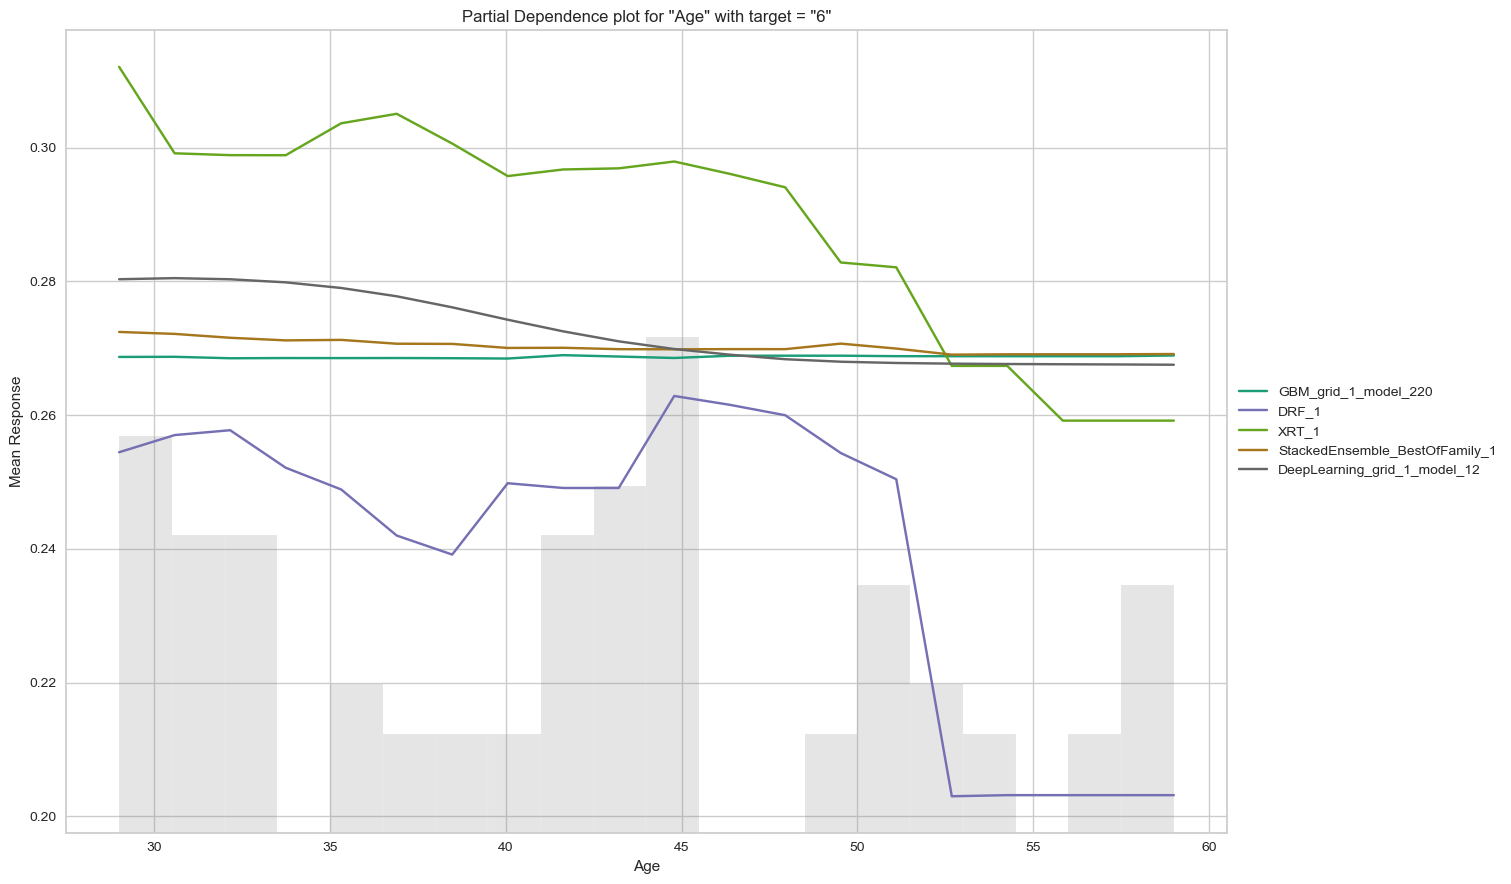

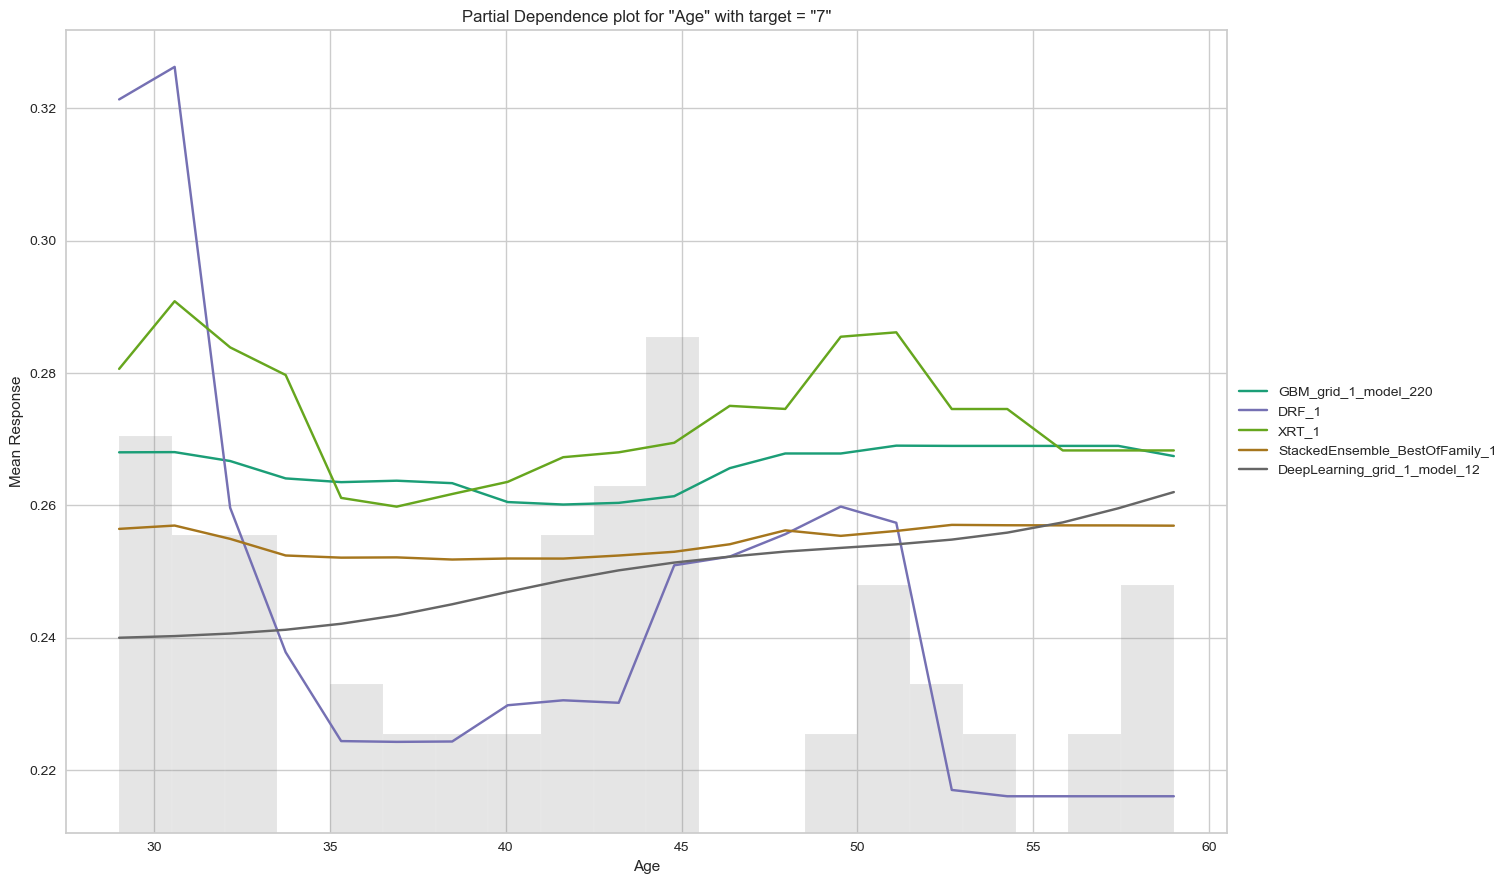

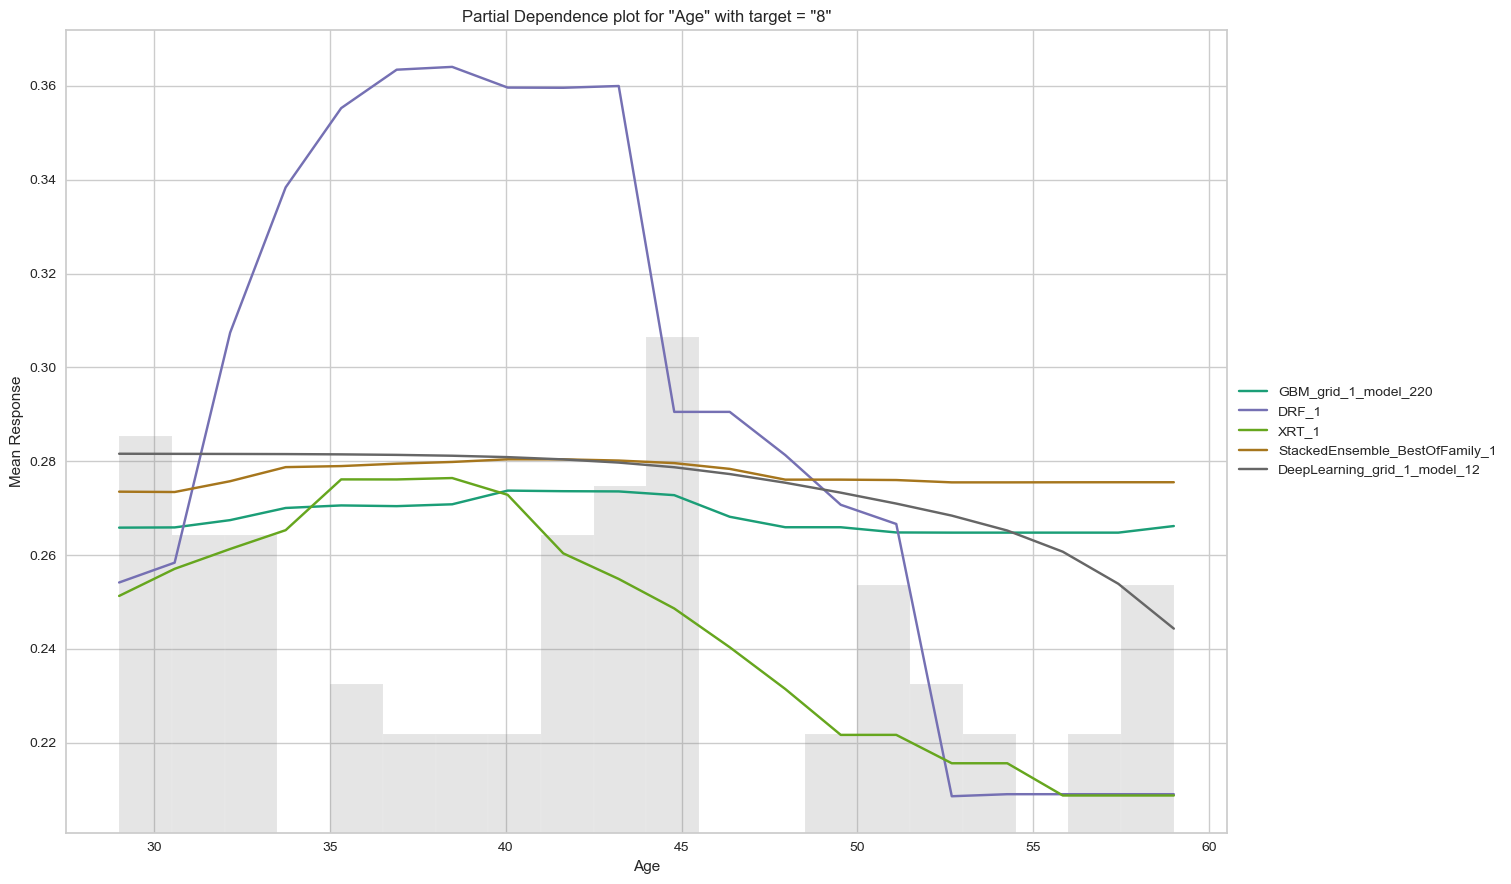

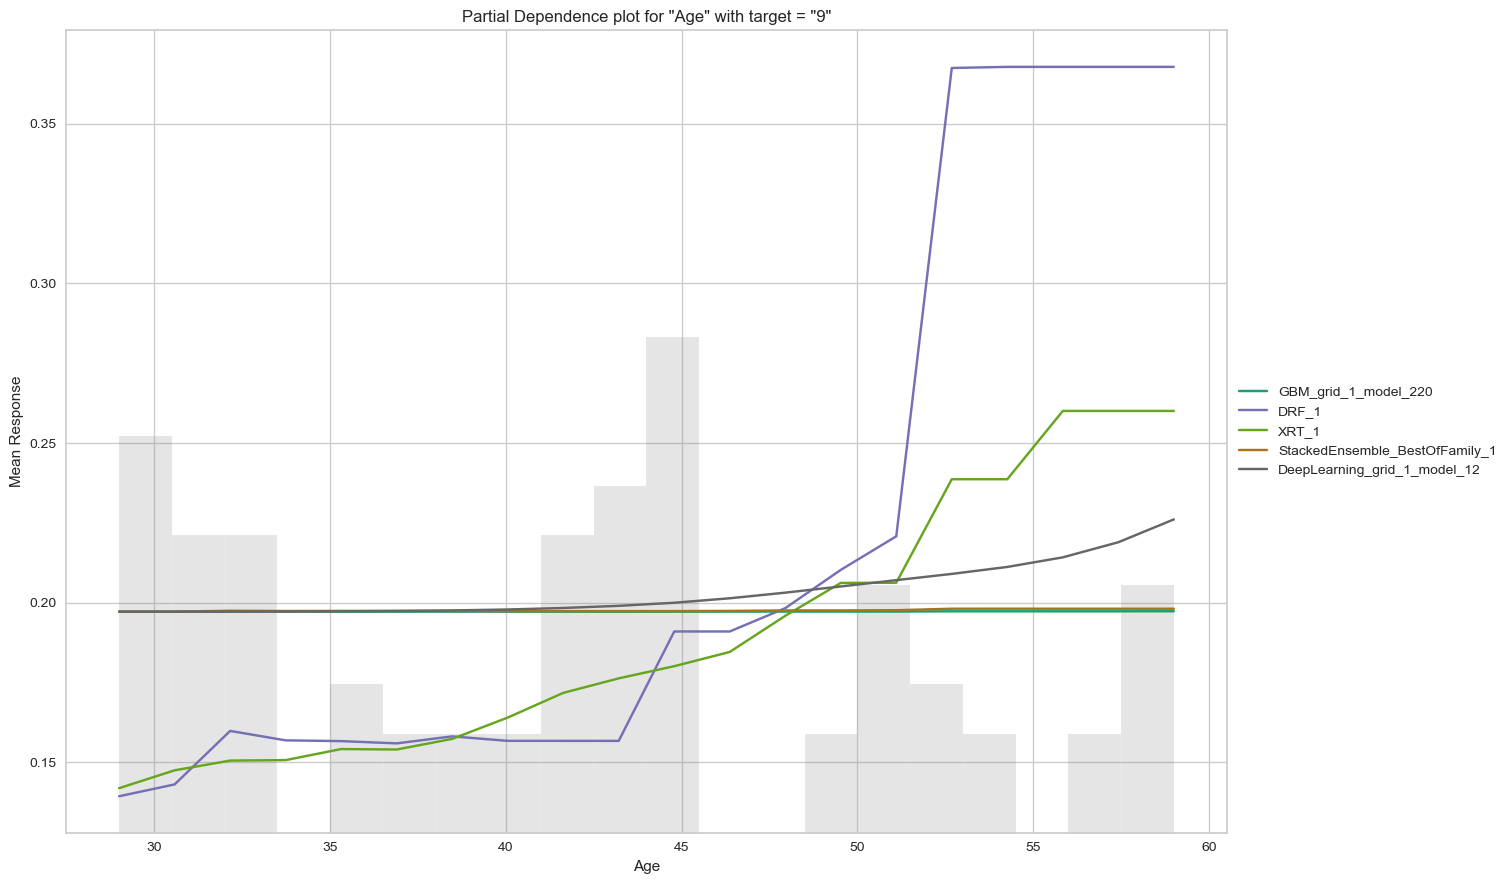

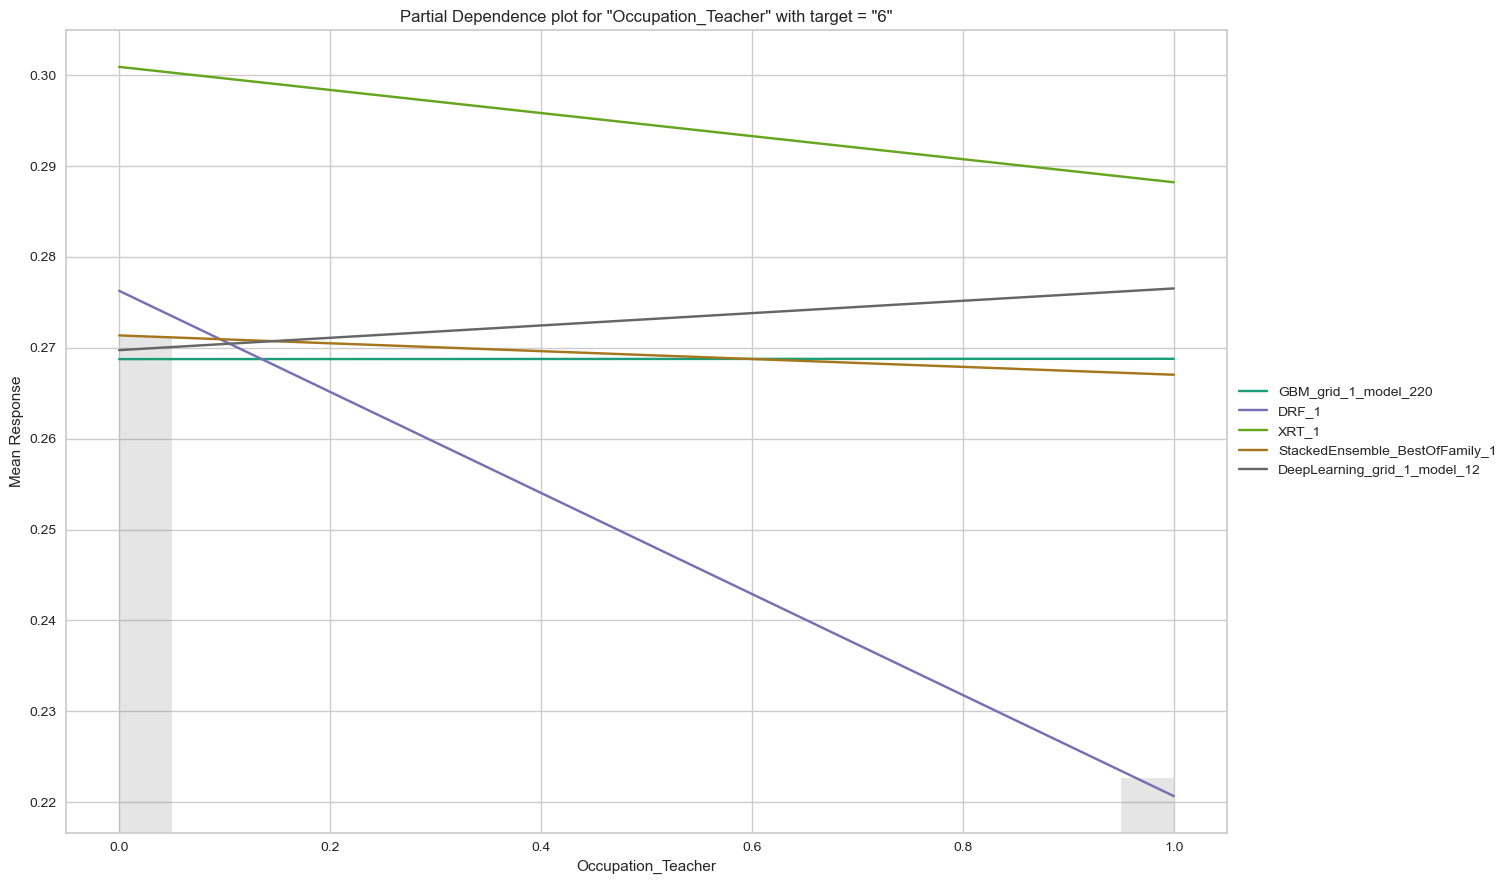

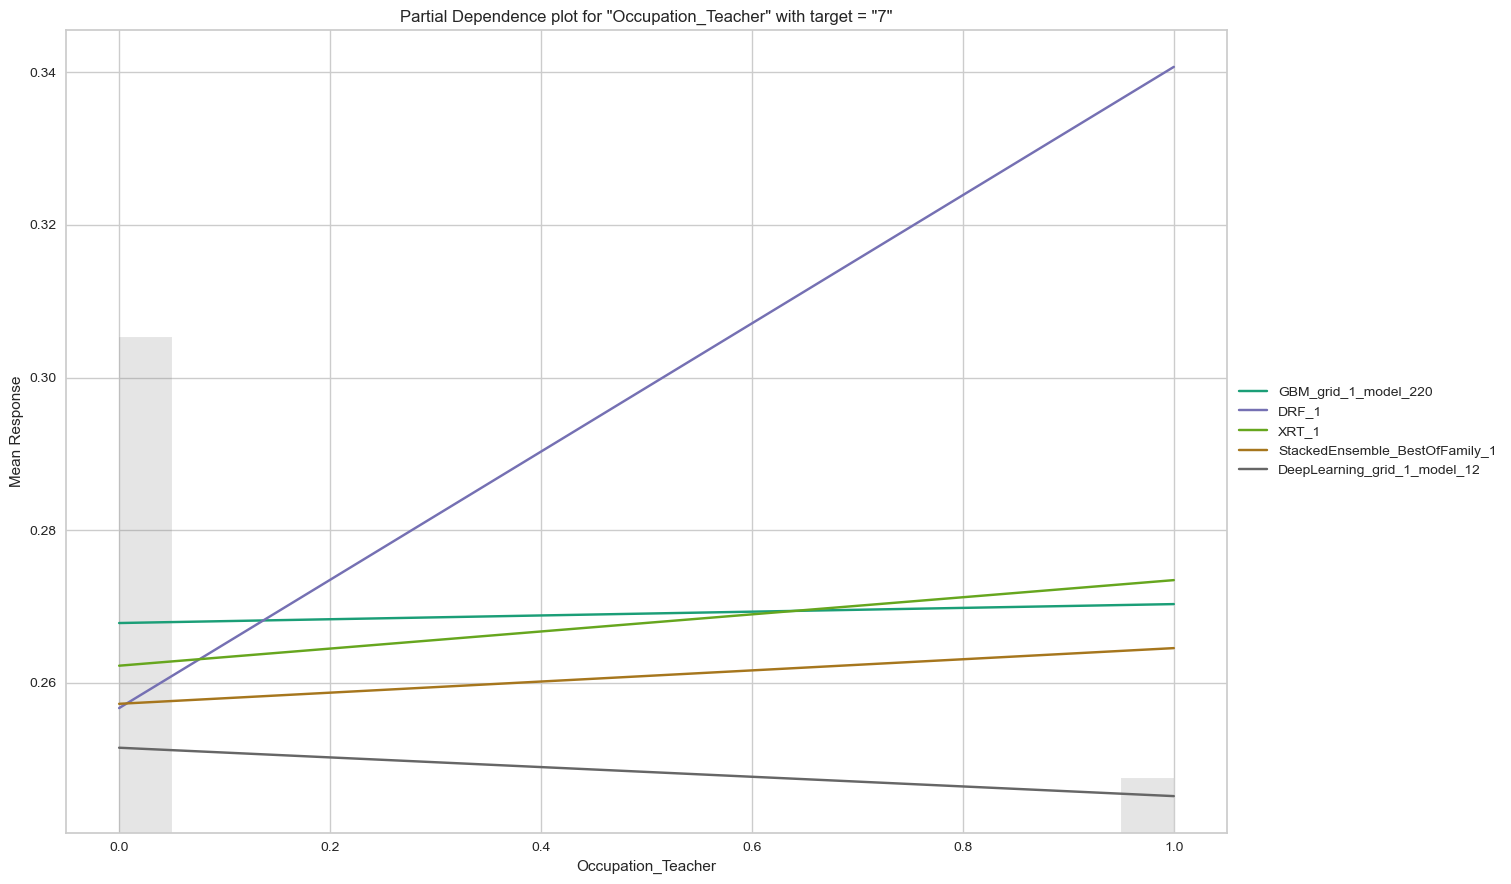

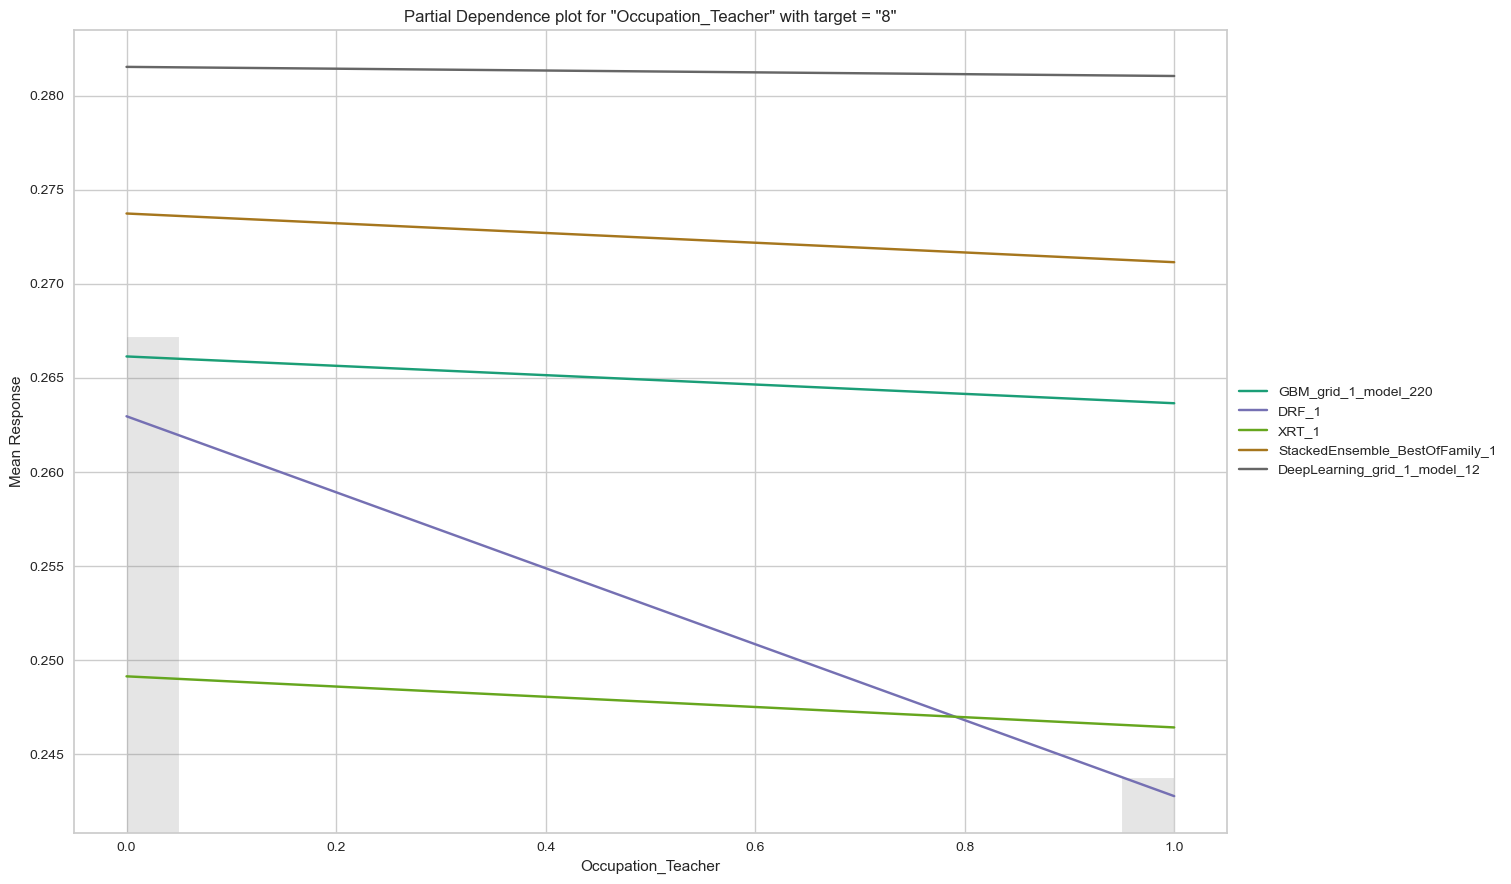

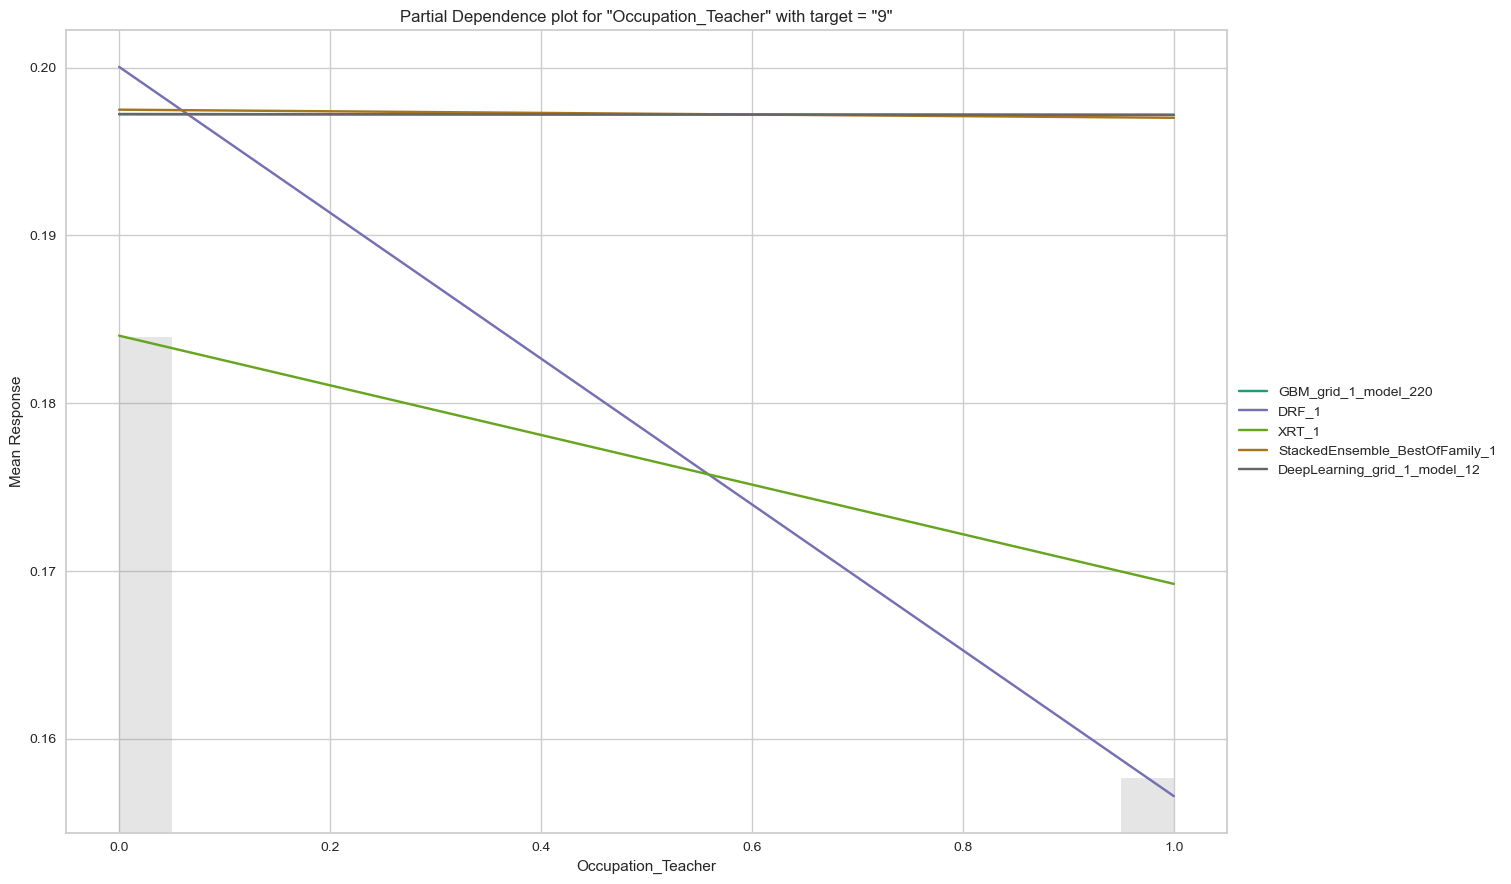

In [41]:
#Explain an AutoML object
exa = aml.explain(test)

Answers:

Is the relationship significant?
A: Yes, The average R-squared value, a measure of how well the model explains the variability of the target variable, is approximately 99.24%. This indicates that the models capture a high proportion of the variance in the target variable.

Are any model assumptions violated?
A: Model assumptions are not violated. Outliers are handled before automl initialization. There is no overfitting after ridge regression. Missing values are also handled.

Is there any multicollinearity in the model?
A: No, there is no multicollinearity in the model which can be inferred from the Variance Inflation Factor.

In the multivariate models are predictor variables independent of all the other predictor variables?
A: Yes, predictor variables independent of all the other predictor variables as we can see from the correlation plot/map.

In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
A: The most significant predictor variable is Sleep Duration and the least significant is BMI Category.

Does the model make sense?
A: Yes, predicting quality of sleep is a classification problem and the automl was able to perform classification algorithms and return the best model as the gradient boost machine. 
The average accuracy across all cross-validation folds is approximately 98.96%.
The average error rate (err) is relatively low, around 1.04%. This means that the models misclassify only a small proportion of instances in the dataset.

Does regularization help?
Yes, regularization helps but to a very minimal extent as values don't change drastically. 
 
Which independent variables are significant?
Sleep Duration

Which hyperparameters are important?
All hyperparameters are important in gradient boosting machine. 
Number of Trees (ntrees): 89
Maximum Depth (max_depth): 15
Minimum Number of Rows (min_rows): 15.0
Learning Rate (learn_rate): 0.1
Distribution: Multinomial
Stopping Metric: Logloss
Stopping Tolerance: 0.05
Maximum Runtime (max_runtime_secs): 128.43625 seconds
Seed: 220
Histogram Type: UniformAdaptive
Calibration Method: PlattScaling
Check Constant Response: True
Auto Rebalance:

Conclusion:

We can infer from the automl that Gradient boosting machine is the best algorithm. 
We have still used cross validation and regression to avoid overfitting.

References

W3schools

Generate 'n' unique random numbers within a range

H2o ai documentation

Smoke Detection Preprocessing from aiskunk

MIT License

Copyright (c) 2024 Divi1393

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.